In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.regularizers import l2

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import random
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.impute import SimpleImputer

In [2]:
# Reading the CSV file into a DataFrame
#soil = pd.read_csv("modified_climate_data_with_filled_crops.csv")

soil = pd.read_csv("final_dataset_in_use.csv")

# Displaying the first few rows of the DataFrame
soil.head()

,Date,Temperature (Â°C),Humidity (%),Precipitation (mm),Dewpoint,Atmospheric Pressure (hPa),Surface Pressure (hPa),Windspeed (m/s),Wind Gusts (m/s),Cloudcover (%),...,X,Y,Zip Code,Soil ph value,Soil Carbon,Nitrogen,soil_temperature_18cm (°C),relative_humidity_2m (%),soil_temperature_18cm (Â°C),Soil Moisture
0,1/1/87 0:00,9.257172,37.162354,2.585012,11.613226,1006.233592,1002.844157,8.281286,13.386389,31.026351,...,-120.658491,36.374849,95043,5.90,1.10,60.000000,38.1,17.0,29.4,6.70
1,1/2/87 0:00,20.573408,66.122358,8.152639,22.008497,1005.800373,1001.080451,7.155496,14.626474,98.217866,...,-120.688055,36.576487,95389,6.97,1.53,83.820000,27.7,57.0,30.0,5.20
2,1/3/87 0:00,20.573408,66.122358,8.152639,22.008497,1005.800373,1001.080451,7.155496,14.626474,98.217866,...,-119.485044,37.320597,95389,6.44,1.70,83.150000,37.6,24.0,29.8,7.75
3,1/4/87 0:00,20.573408,66.122358,8.152639,22.008497,1005.800373,1001.080451,7.155496,14.626474,98.217866,...,-118.944738,36.729285,93633,6.58,1.93,60.000000,41.1,21.0,33.2,5.30
4,1/5/87 0:00,8.297021,80.975202,3.916953,3.963066,1005.744293,1002.485993,6.933044,14.021291,65.067024,...,-120.649802,36.370575,95043,5.87,1.10,67.607083,37.4,16.0,29.9,6.10


In [3]:
# Display the size of the dataset
print("Dataset Size:", soil.shape)

Dataset Size: (13149, 23)


In [4]:
# Display column names, data types, and other info
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13149 entries, 0 to 13148
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         13149 non-null  object 
 1   Temperature (Â°C)            13149 non-null  float64
 2   Humidity (%)                 13149 non-null  float64
 3   Precipitation (mm)           13149 non-null  float64
 4   Dewpoint                     13149 non-null  float64
 5   Atmospheric Pressure (hPa)   13149 non-null  float64
 6   Surface Pressure (hPa)       13149 non-null  float64
 7   Windspeed (m/s)              13149 non-null  float64
 8   Wind Gusts (m/s)             13149 non-null  float64
 9   Cloudcover (%)               13149 non-null  float64
 10  Evapotranspiration (mm)      13149 non-null  float64
 11  Soil Type                    13149 non-null  object 
 12  Crops Grown                  13149 non-null  object 
 13  X               

In [5]:
# Display summary statistics for numerical columns
soil.describe()

,Temperature (Â°C),Humidity (%),Precipitation (mm),Dewpoint,Atmospheric Pressure (hPa),Surface Pressure (hPa),Windspeed (m/s),Wind Gusts (m/s),Cloudcover (%),Evapotranspiration (mm),X,Y,Zip Code,Soil ph value,Soil Carbon,Nitrogen,soil_temperature_18cm (°C),relative_humidity_2m (%),soil_temperature_18cm (Â°C),Soil Moisture
count,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000,13149.000000
mean,22.460073,63.263782,4.988929,14.593705,1011.137435,1011.166215,5.141032,8.321482,49.831308,2.491643,-119.781783,36.914828,95218.868659,6.508544,1.253507,62.507740,24.281657,55.701382,24.369045,8.972204
std,7.087389,19.439150,2.907822,7.037132,7.426471,7.901988,2.792748,3.369939,29.133275,1.368235,0.307655,0.374265,546.755956,0.709652,0.377335,12.646327,5.739048,22.652877,5.343386,2.922243
min,-0.581125,30.007818,0.003559,-9.163595,990.011105,990.002881,0.001054,0.220860,0.018315,-1.659196,-120.785741,35.852215,93210.000000,4.800000,0.400000,40.000000,-2.255019,6.000000,-0.915313,3.700000
25%,17.767040,46.607472,2.478777,9.513366,1007.033208,1006.634926,2.782318,5.808164,24.247576,1.530540,-119.787251,36.907467,95389.000000,6.080000,1.100000,53.847311,20.129428,35.461034,20.446194,6.400000
50%,22.443420,63.085378,5.021812,14.863204,1012.058108,1011.938949,5.117782,8.337542,49.636646,2.269602,-119.780069,36.914840,95389.000000,6.510000,1.100000,61.223320,25.248197,50.784845,25.758775,8.250000
75%,27.153906,79.550704,7.522346,19.807234,1016.313776,1016.726465,7.577047,10.899794,75.289163,3.237292,-119.772595,36.922072,95389.000000,6.940000,1.462602,67.786940,28.129475,74.577718,28.456551,11.350710
max,44.601003,99.990932,9.999707,39.650087,1032.178987,1034.030326,9.998322,14.995841,99.993550,5.999766,-118.933455,37.716797,95389.000000,35.500000,2.800000,145.190000,45.000000,109.526152,43.627086,14.999829


## Handling the Null Values

In [6]:
# Checking for missing values
soil.isnull().sum()

Date                           0
Temperature (Â°C)              0
Humidity (%)                   0
Precipitation (mm)             0
Dewpoint                       0
Atmospheric Pressure (hPa)     0
Surface Pressure (hPa)         0
Windspeed (m/s)                0
Wind Gusts (m/s)               0
Cloudcover (%)                 0
Evapotranspiration (mm)        0
Soil Type                      0
Crops Grown                    0
X                              0
Y                              0
Zip Code                       0
Soil ph value                  0
Soil Carbon                    0
Nitrogen                       0
soil_temperature_18cm (°C)     0
relative_humidity_2m (%)       0
soil_temperature_18cm (Â°C)    0
Soil Moisture                  0
dtype: int64

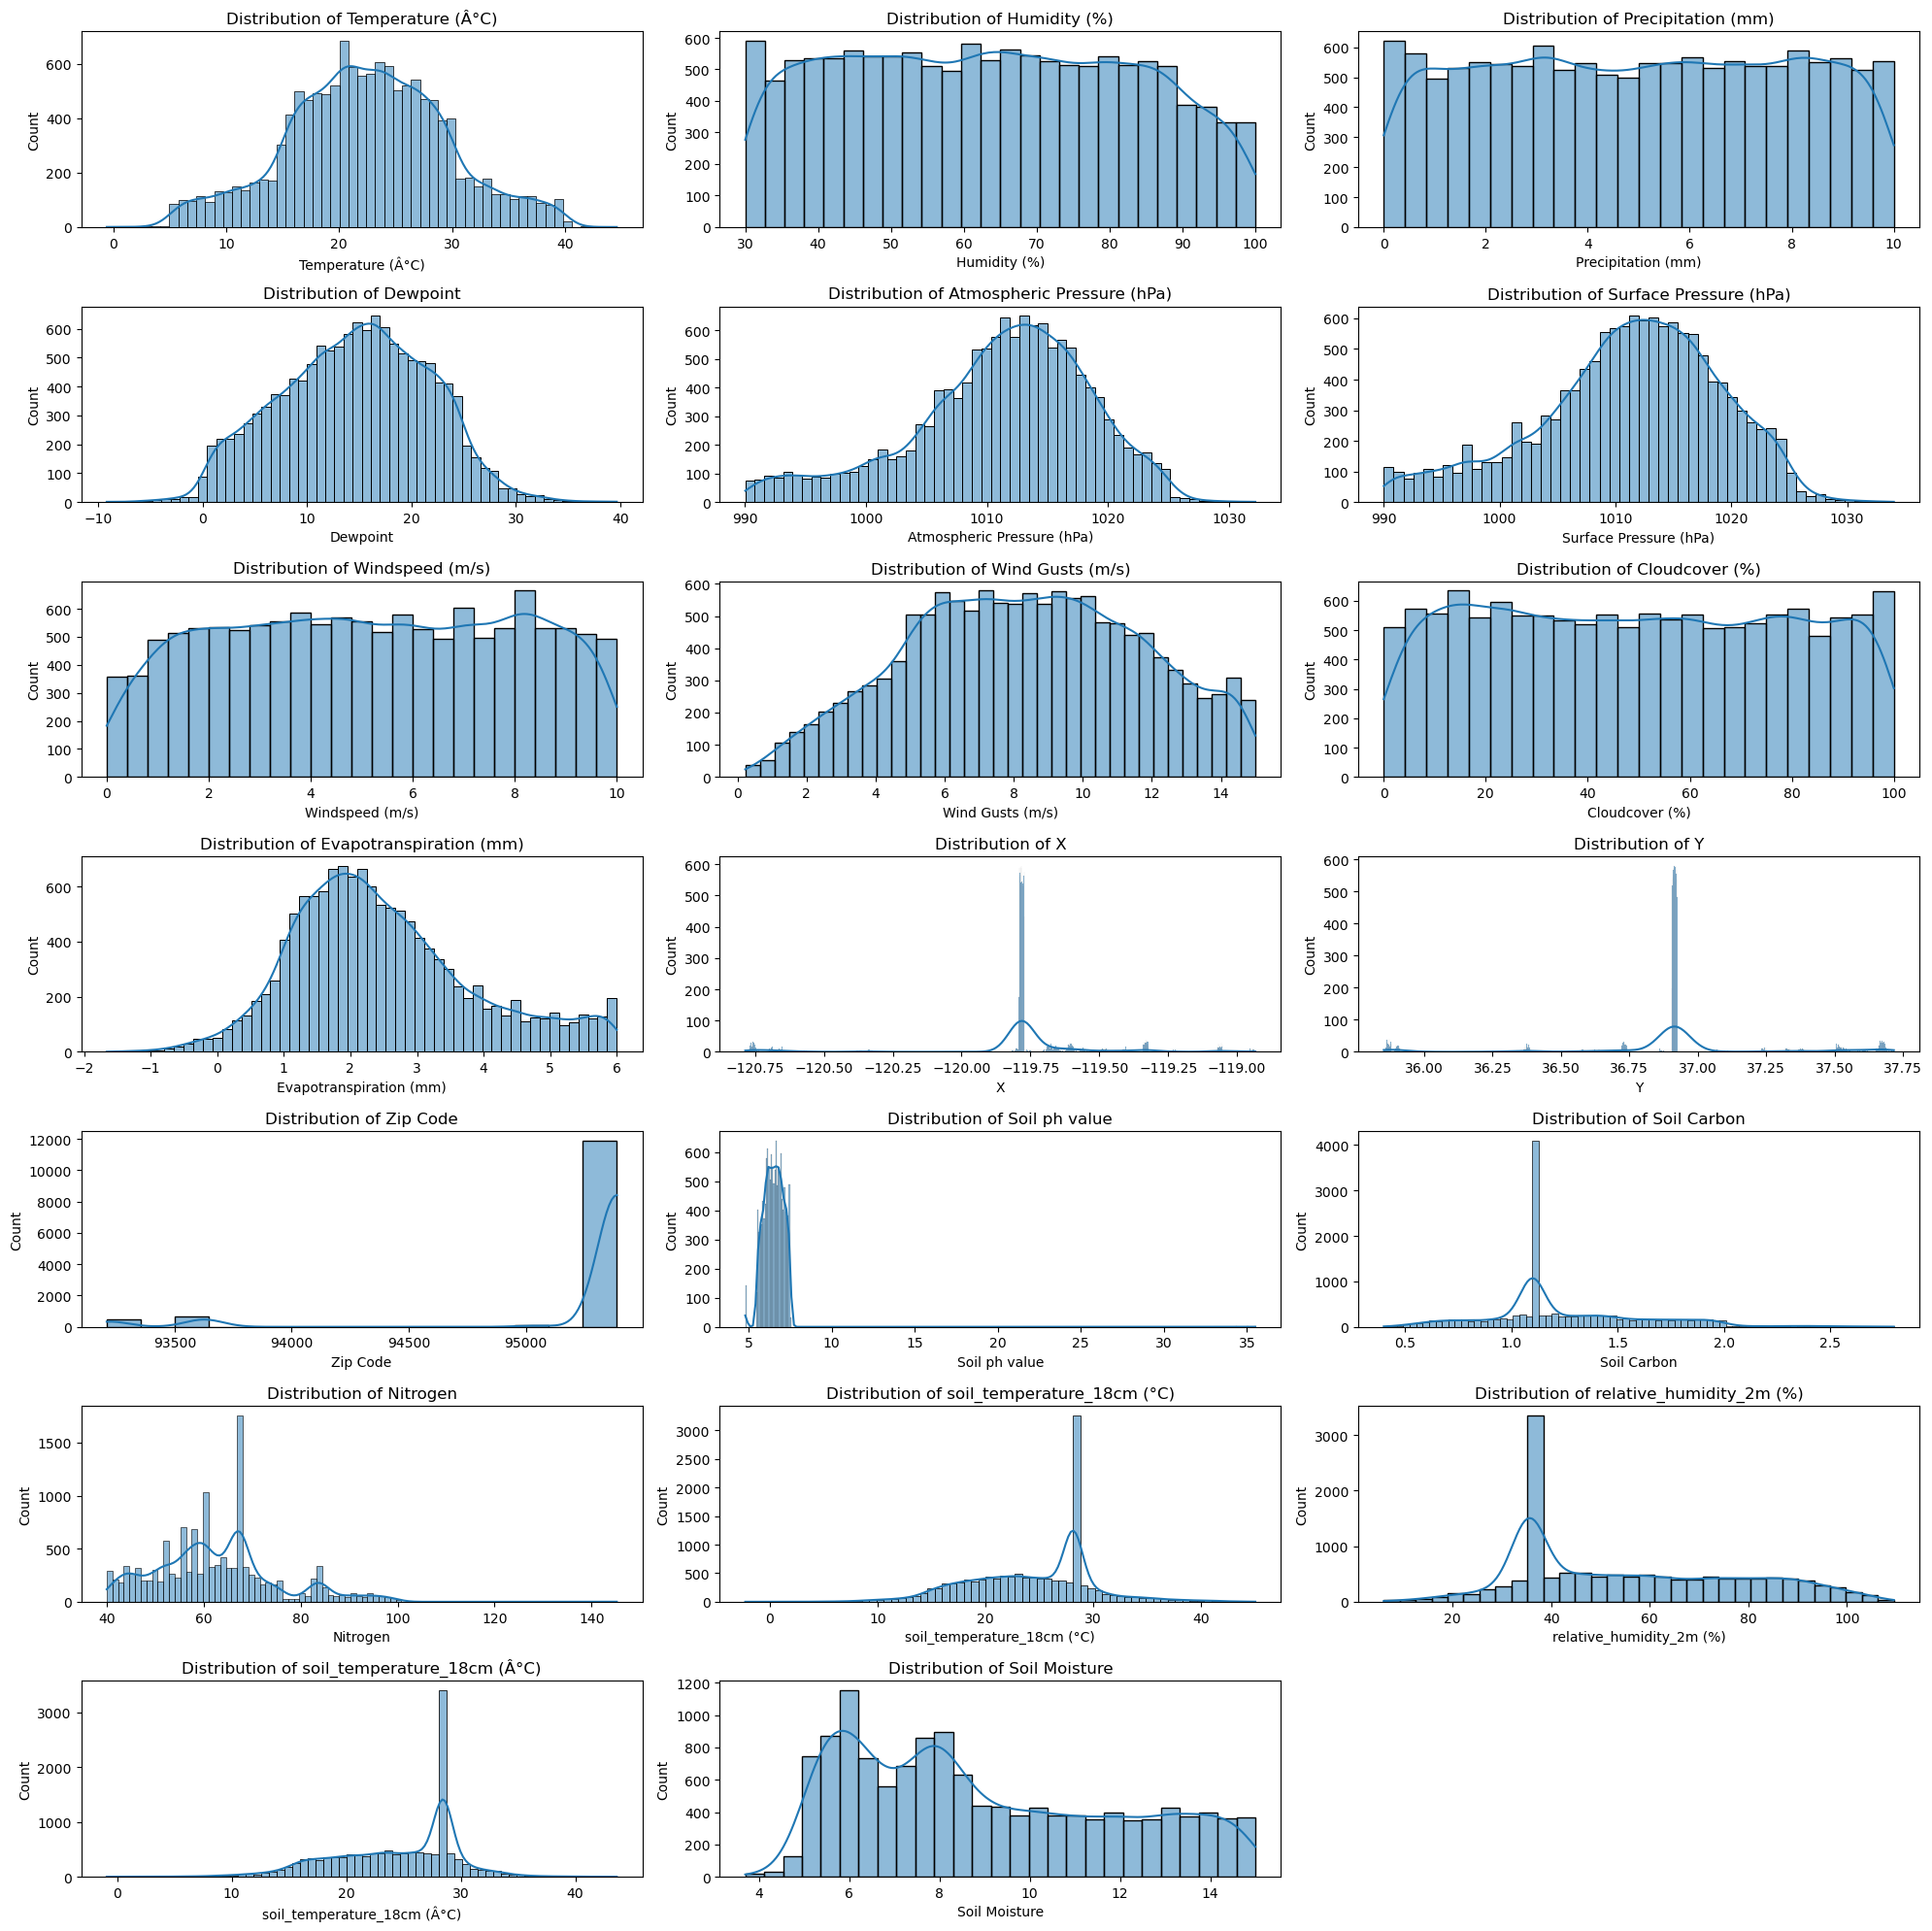

In [7]:
# List of numeric columns for visualization
numeric_cols = soil.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot layout for multiple columns
plt.figure(figsize=(20, 20))

# Loop through the numeric columns to visualize distributions
for i, col in enumerate(numeric_cols, 1):
    # Subplot for each column
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.histplot(soil[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

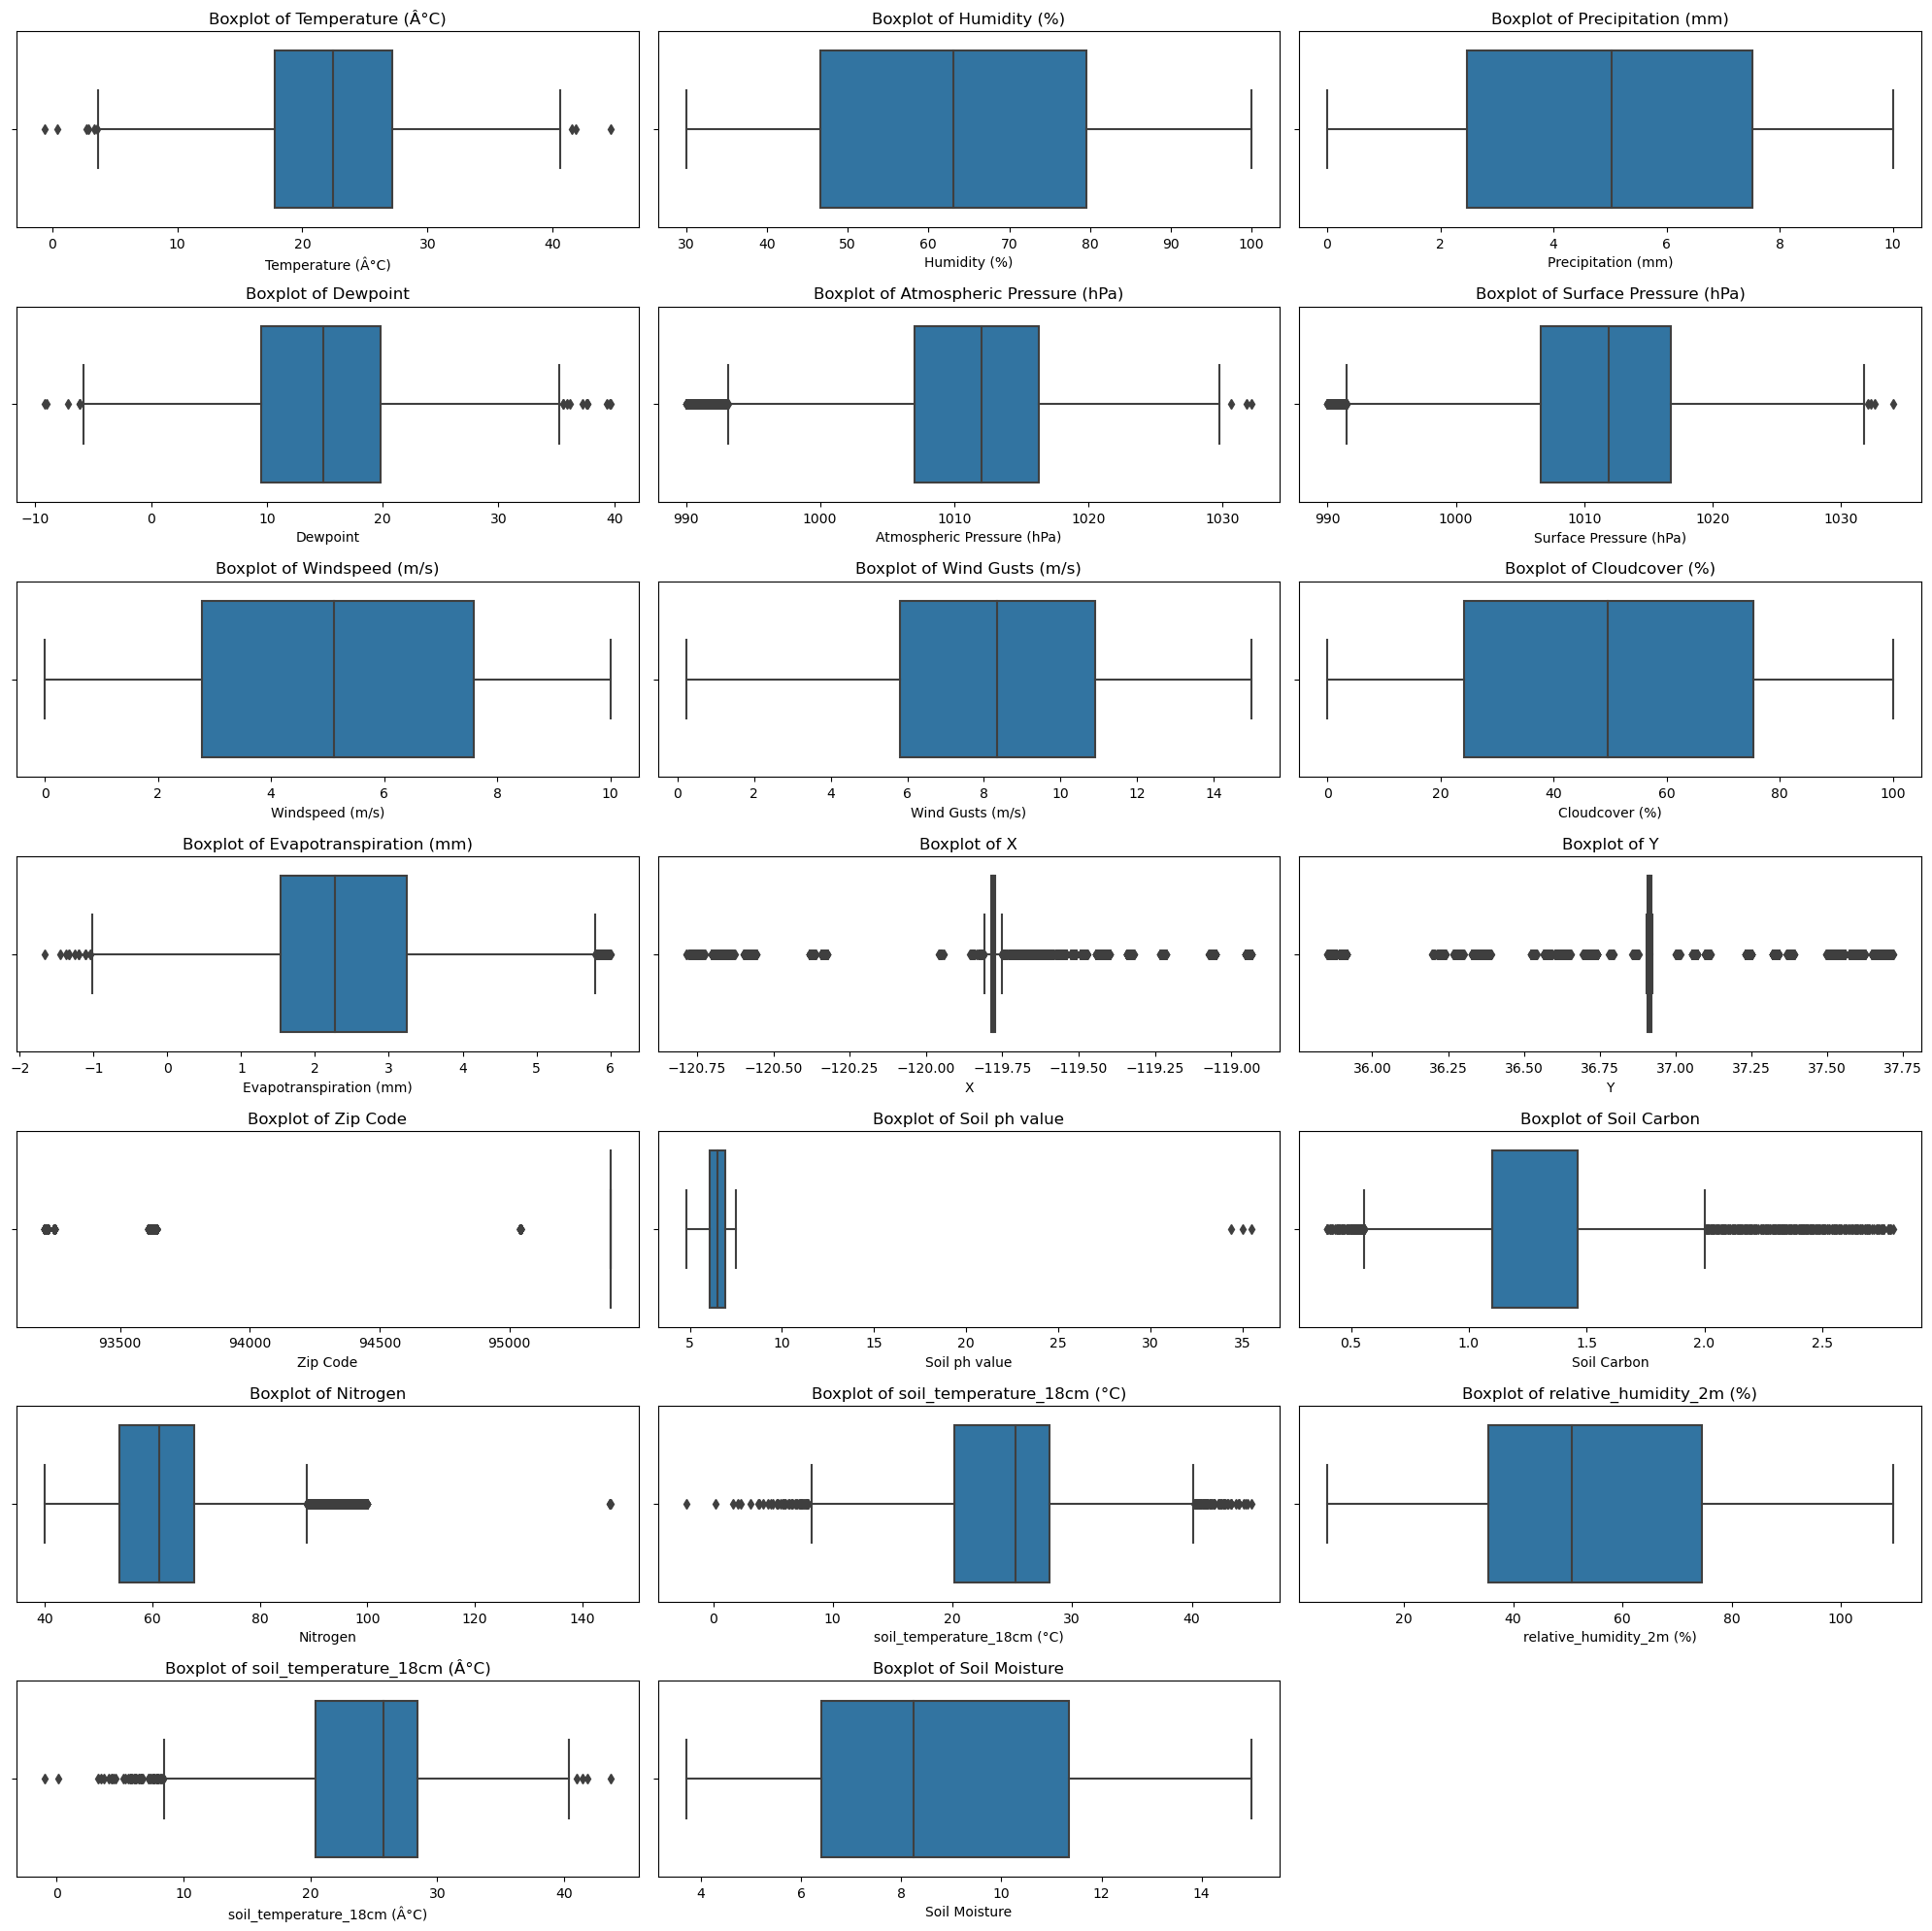

In [8]:
# Boxplots to check for outliers
plt.figure(figsize=(20, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.boxplot(x=soil[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [9]:
# 1. Dropping rows with missing lat/long)
soil.dropna(subset=['X', 'Y'], inplace=True)

In [10]:
# 2. Convert 'Date' column to datetime and extract useful features
soil['Date'] = pd.to_datetime(soil['Date'], errors='coerce')  # Handle any parsing errors
soil['Year'] = soil['Date'].dt.year
soil['Month'] = soil['Date'].dt.month
soil['Day'] = soil['Date'].dt.day

# Drop the original 'Date' column if no longer needed
soil.drop(columns=['Date'], inplace=True)

# 3. Handle categorical columns ('Soil Type', 'Crops Grown') using Label Encoding
label_encoder = LabelEncoder()

# Encoding 'Soil Type'
soil['Soil Type'] = label_encoder.fit_transform(soil['Soil Type'].astype(str))

# Encoding 'Crops Grown' - handling missing values by filling with a placeholder ('Unknown')
soil['Crops Grown'].fillna('Unknown', inplace=True)
soil['Crops Grown'] = label_encoder.fit_transform(soil['Crops Grown'].astype(str))

# 3. Convert 'Soil ph value' to numeric, coercing errors to NaN
soil['Soil ph value'] = pd.to_numeric(soil['Soil ph value'], errors='coerce')

# Check the resulting data types to ensure everything is numeric now
print(soil.info())

# Display the first few rows to confirm the conversion
soil.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13149 entries, 0 to 13148
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperature (Â°C)            13149 non-null  float64
 1   Humidity (%)                 13149 non-null  float64
 2   Precipitation (mm)           13149 non-null  float64
 3   Dewpoint                     13149 non-null  float64
 4   Atmospheric Pressure (hPa)   13149 non-null  float64
 5   Surface Pressure (hPa)       13149 non-null  float64
 6   Windspeed (m/s)              13149 non-null  float64
 7   Wind Gusts (m/s)             13149 non-null  float64
 8   Cloudcover (%)               13149 non-null  float64
 9   Evapotranspiration (mm)      13149 non-null  float64
 10  Soil Type                    13149 non-null  int64  
 11  Crops Grown                  13149 non-null  int64  
 12  X                            13149 non-null  float64
 13  Y               

,Temperature (Â°C),Humidity (%),Precipitation (mm),Dewpoint,Atmospheric Pressure (hPa),Surface Pressure (hPa),Windspeed (m/s),Wind Gusts (m/s),Cloudcover (%),Evapotranspiration (mm),...,Soil ph value,Soil Carbon,Nitrogen,soil_temperature_18cm (°C),relative_humidity_2m (%),soil_temperature_18cm (Â°C),Soil Moisture,Year,Month,Day
0,9.257172,37.162354,2.585012,11.613226,1006.233592,1002.844157,8.281286,13.386389,31.026351,2.567469,...,5.90,1.10,60.000000,38.1,17.0,29.4,6.70,1987,1,1
1,20.573408,66.122358,8.152639,22.008497,1005.800373,1001.080451,7.155496,14.626474,98.217866,3.948161,...,6.97,1.53,83.820000,27.7,57.0,30.0,5.20,1987,1,2
2,20.573408,66.122358,8.152639,22.008497,1005.800373,1001.080451,7.155496,14.626474,98.217866,3.948161,...,6.44,1.70,83.150000,37.6,24.0,29.8,7.75,1987,1,3
3,20.573408,66.122358,8.152639,22.008497,1005.800373,1001.080451,7.155496,14.626474,98.217866,3.948161,...,6.58,1.93,60.000000,41.1,21.0,33.2,5.30,1987,1,4
4,8.297021,80.975202,3.916953,3.963066,1005.744293,1002.485993,6.933044,14.021291,65.067024,2.167362,...,5.87,1.10,67.607083,37.4,16.0,29.9,6.10,1987,1,5


In [11]:
# 2. Impute missing values with the median for all numeric columns
soil.fillna(soil.median(numeric_only=True), inplace=True)

In [12]:
# Checking if all missing values have been handled
print("\nMissing values after imputation:")
print(soil.isnull().sum())


Missing values after imputation:
Temperature (Â°C)              0
Humidity (%)                   0
Precipitation (mm)             0
Dewpoint                       0
Atmospheric Pressure (hPa)     0
Surface Pressure (hPa)         0
Windspeed (m/s)                0
Wind Gusts (m/s)               0
Cloudcover (%)                 0
Evapotranspiration (mm)        0
Soil Type                      0
Crops Grown                    0
X                              0
Y                              0
Zip Code                       0
Soil ph value                  0
Soil Carbon                    0
Nitrogen                       0
soil_temperature_18cm (°C)     0
relative_humidity_2m (%)       0
soil_temperature_18cm (Â°C)    0
Soil Moisture                  0
Year                           0
Month                          0
Day                            0
dtype: int64


In [13]:
# Displaying the first few rows of the updated DataFrame
soil.head()

,Temperature (Â°C),Humidity (%),Precipitation (mm),Dewpoint,Atmospheric Pressure (hPa),Surface Pressure (hPa),Windspeed (m/s),Wind Gusts (m/s),Cloudcover (%),Evapotranspiration (mm),...,Soil ph value,Soil Carbon,Nitrogen,soil_temperature_18cm (°C),relative_humidity_2m (%),soil_temperature_18cm (Â°C),Soil Moisture,Year,Month,Day
0,9.257172,37.162354,2.585012,11.613226,1006.233592,1002.844157,8.281286,13.386389,31.026351,2.567469,...,5.90,1.10,60.000000,38.1,17.0,29.4,6.70,1987,1,1
1,20.573408,66.122358,8.152639,22.008497,1005.800373,1001.080451,7.155496,14.626474,98.217866,3.948161,...,6.97,1.53,83.820000,27.7,57.0,30.0,5.20,1987,1,2
2,20.573408,66.122358,8.152639,22.008497,1005.800373,1001.080451,7.155496,14.626474,98.217866,3.948161,...,6.44,1.70,83.150000,37.6,24.0,29.8,7.75,1987,1,3
3,20.573408,66.122358,8.152639,22.008497,1005.800373,1001.080451,7.155496,14.626474,98.217866,3.948161,...,6.58,1.93,60.000000,41.1,21.0,33.2,5.30,1987,1,4
4,8.297021,80.975202,3.916953,3.963066,1005.744293,1002.485993,6.933044,14.021291,65.067024,2.167362,...,5.87,1.10,67.607083,37.4,16.0,29.9,6.10,1987,1,5


## Handling the duplicates

In [14]:
# Checking for duplicates in the DataFrame
duplicates = soil.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## Feature Scaling - Z Score Normalization

In [15]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Select numeric columns for scaling
numeric_cols = soil.select_dtypes(include=['float64', 'int64']).columns

# Apply standardization to the numeric columns
soil[numeric_cols] = scaler.fit_transform(soil[numeric_cols])

# Display the first few rows to confirm scaling
soil.head()

,Temperature (Â°C),Humidity (%),Precipitation (mm),Dewpoint,Atmospheric Pressure (hPa),Surface Pressure (hPa),Windspeed (m/s),Wind Gusts (m/s),Cloudcover (%),Evapotranspiration (mm),...,Soil ph value,Soil Carbon,Nitrogen,soil_temperature_18cm (°C),relative_humidity_2m (%),soil_temperature_18cm (Â°C),Soil Moisture,Year,Month,Day
0,-1.862943,-1.342776,-0.826738,-0.423552,-0.660345,-1.053200,1.124474,1.503024,-0.645505,0.055421,...,-0.857557,-0.406835,-0.198305,2.407868,-1.708518,0.941565,-0.777584,-1.684561,-1.601451,-1.673805
1,-0.266211,0.147058,1.088041,1.053707,-0.718681,-1.276406,0.721347,1.871022,1.660932,1.064564,...,0.650281,0.732779,1.685317,0.595652,0.057329,1.053858,-1.290908,-1.684561,-1.601451,-1.560170
2,-0.266211,0.147058,1.088041,1.053707,-0.718681,-1.276406,0.721347,1.871022,1.660932,1.064564,...,-0.096592,1.183324,1.632335,2.320742,-1.399495,1.016427,-0.418258,-1.684561,-1.601451,-1.446535
3,-0.266211,0.147058,1.088041,1.053707,-0.718681,-1.276406,0.721347,1.871022,1.660932,1.064564,...,0.100695,1.792885,-0.198305,2.930623,-1.531934,1.652752,-1.256687,-1.684561,-1.601451,-1.332899
4,-1.998422,0.911156,-0.368667,-1.510707,-0.726233,-1.098528,0.641691,1.691433,0.522986,-0.237016,...,-0.899833,-0.406835,0.403243,2.285892,-1.752664,1.035142,-0.982914,-1.684561,-1.601451,-1.219264


___

## EDA's

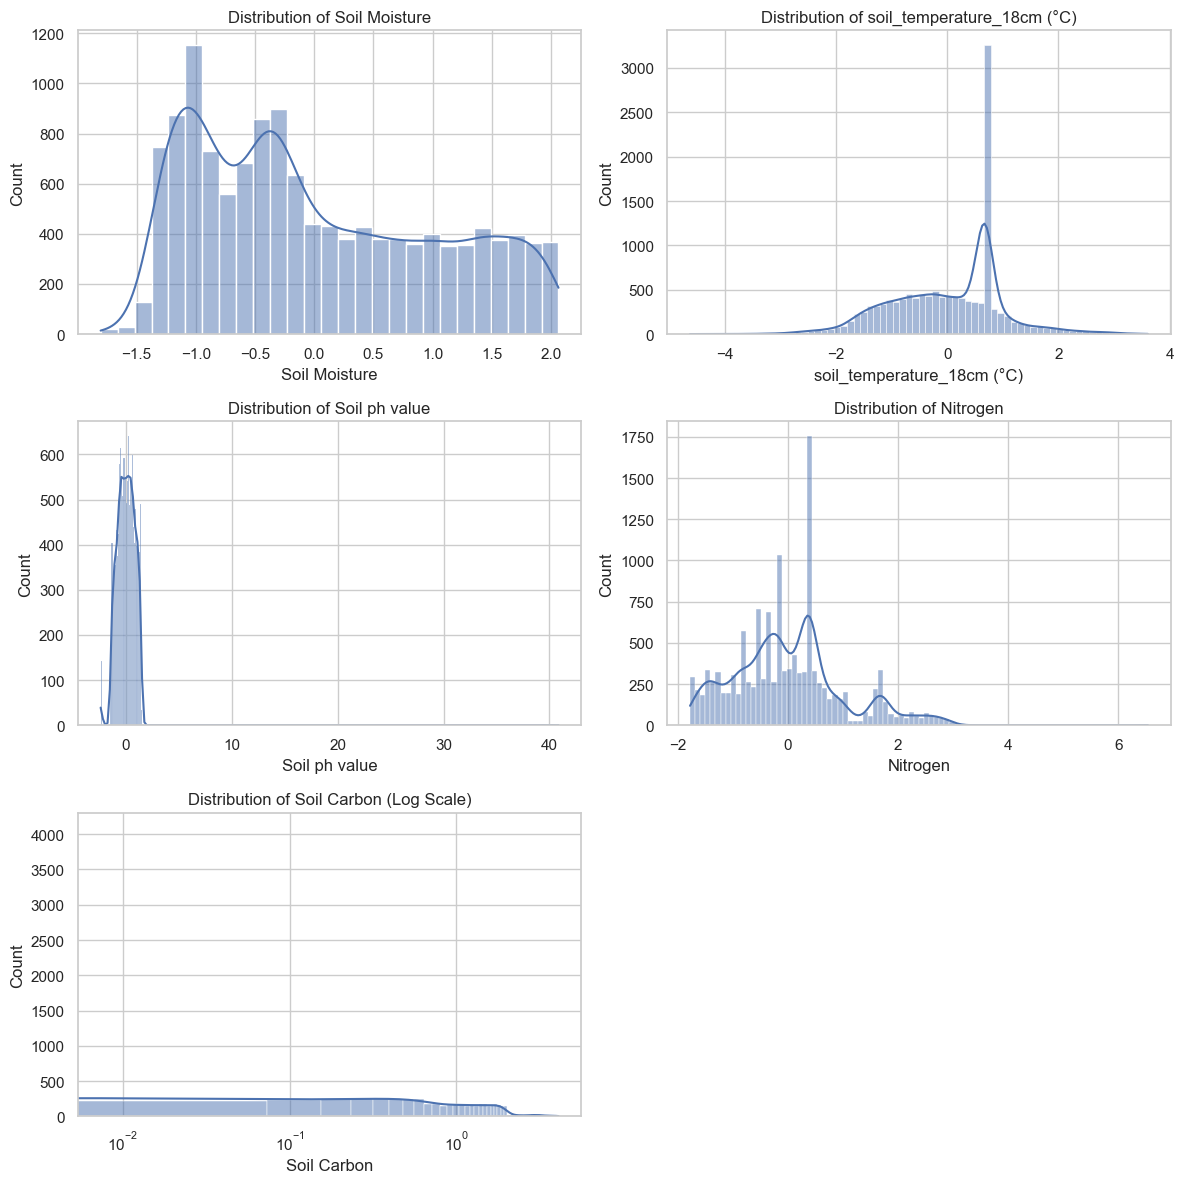

In [16]:
# Set style for seaborn
sns.set(style='whitegrid')

# 1. Distribution Plots
# List of target variables
target_vars = ['Soil Moisture', 'soil_temperature_18cm (°C)', 'Soil ph value', 'Nitrogen', 'Soil Carbon']

# Create a figure and axes
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting histograms
for ax, var in zip(axes, target_vars):
    if var == 'Soil Carbon':
        sns.histplot(soil[var], kde=True, ax=ax)
        ax.set_title(f'Distribution of {var} (Log Scale)')
        ax.set_xlabel(var)
        ax.set_xscale('log')  # Set x-axis to logarithmic scale
    else:
        sns.histplot(soil[var], kde=True, ax=ax)
        ax.set_title(f'Distribution of {var}')
        ax.set_xlabel(var)

# Hide any remaining empty axes
for i in range(len(target_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

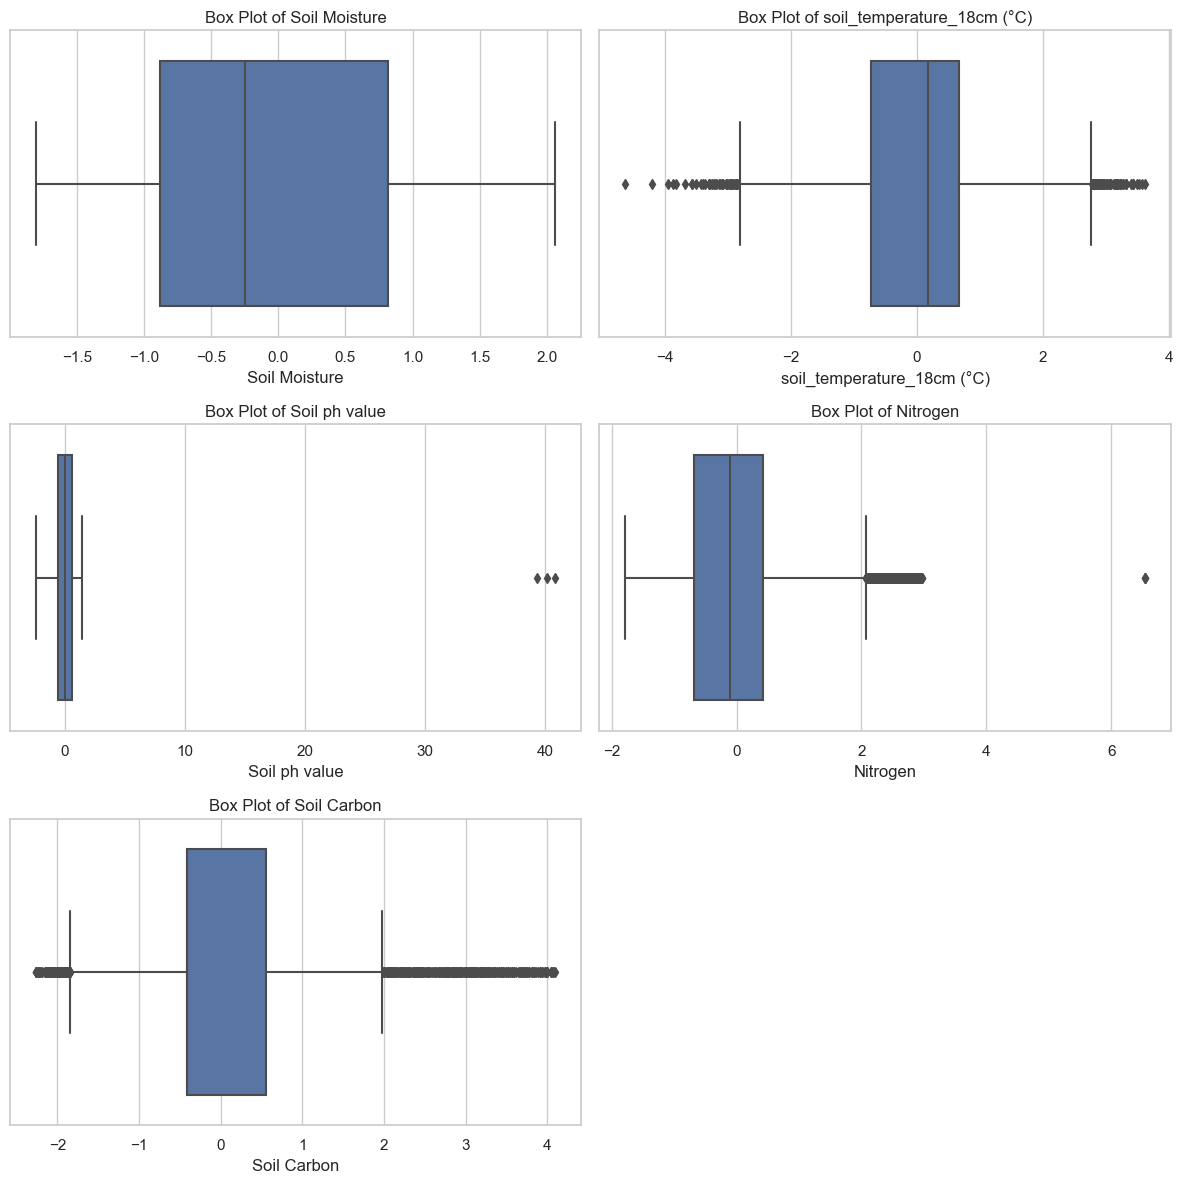

In [17]:
# 2. Box Plots
# List of target variables
target_vars = ['Soil Moisture', 'soil_temperature_18cm (°C)', 'Soil ph value', 'Nitrogen', 'Soil Carbon']

# Create a figure and axes
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting box plots
for ax, var in zip(axes, target_vars):
    # Check if the variable has enough non-null entries
    if soil[var].notnull().sum() > 1:  # Need at least 2 values to plot
        sns.boxplot(x=soil[var], ax=ax)
        ax.set_title(f'Box Plot of {var}')
        ax.set_xlabel(var)
    else:
        ax.set_title(f'Insufficient Data for {var}')
        ax.text(0.5, 0.5, 'No Data', fontsize=12, ha='center')  # Indicate lack of data

# Hide any remaining empty axes
for i in range(len(target_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

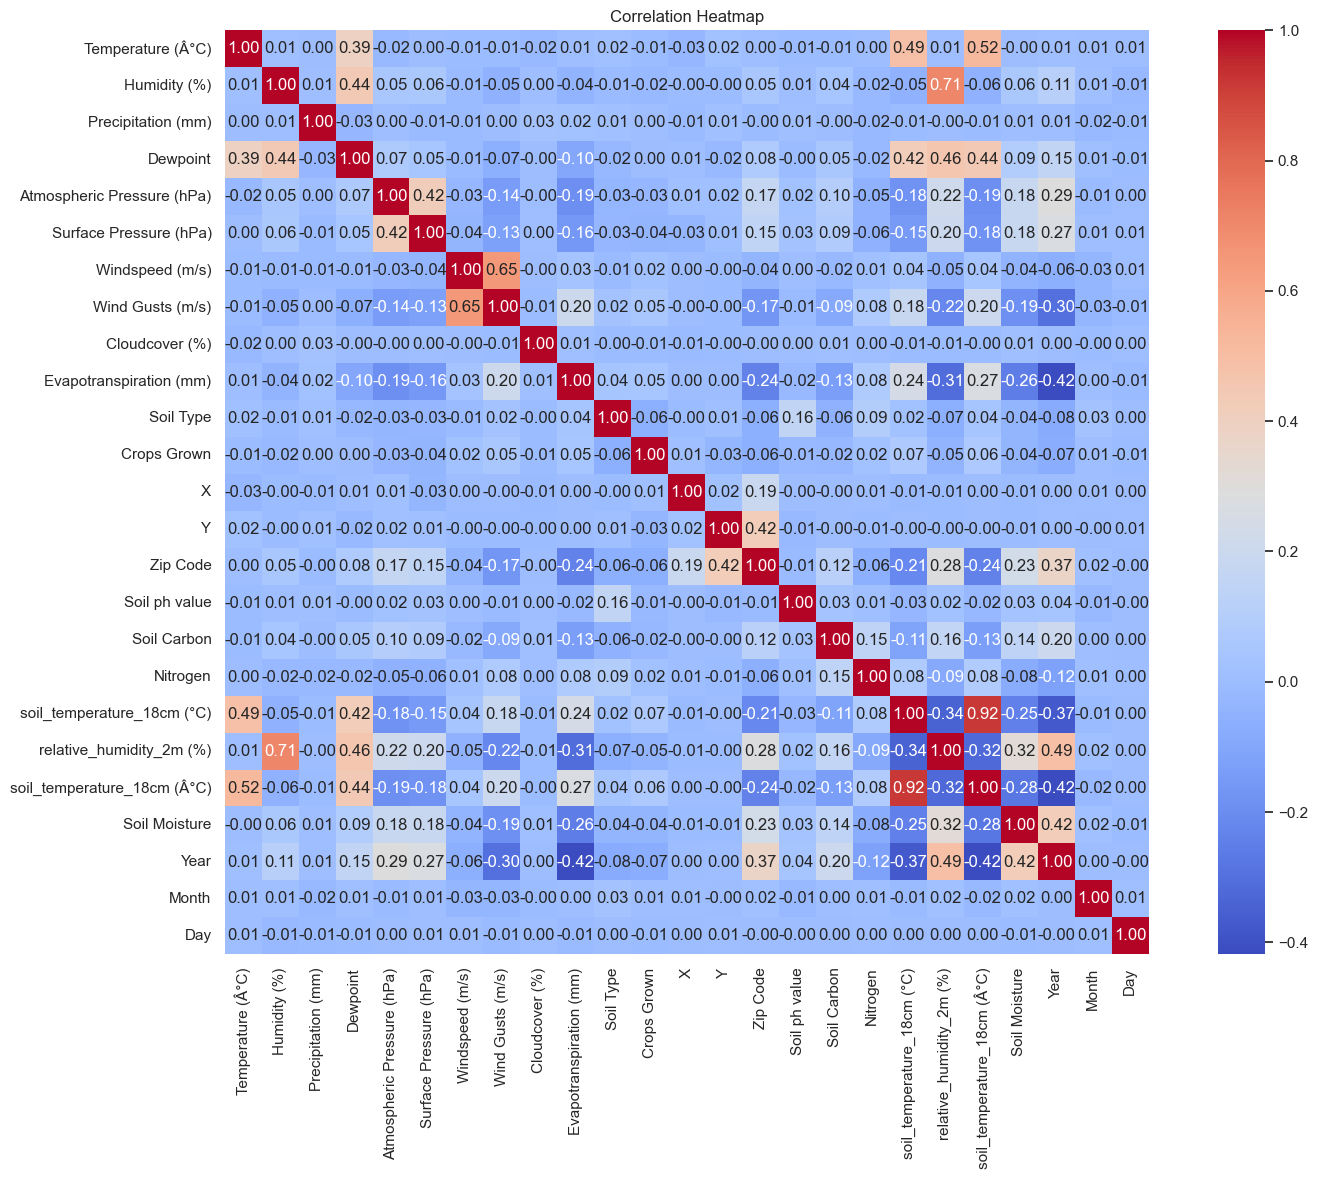

In [18]:
# 3. Correlation Heatmap
plt.figure(figsize=(18, 12))
correlation_matrix = soil.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

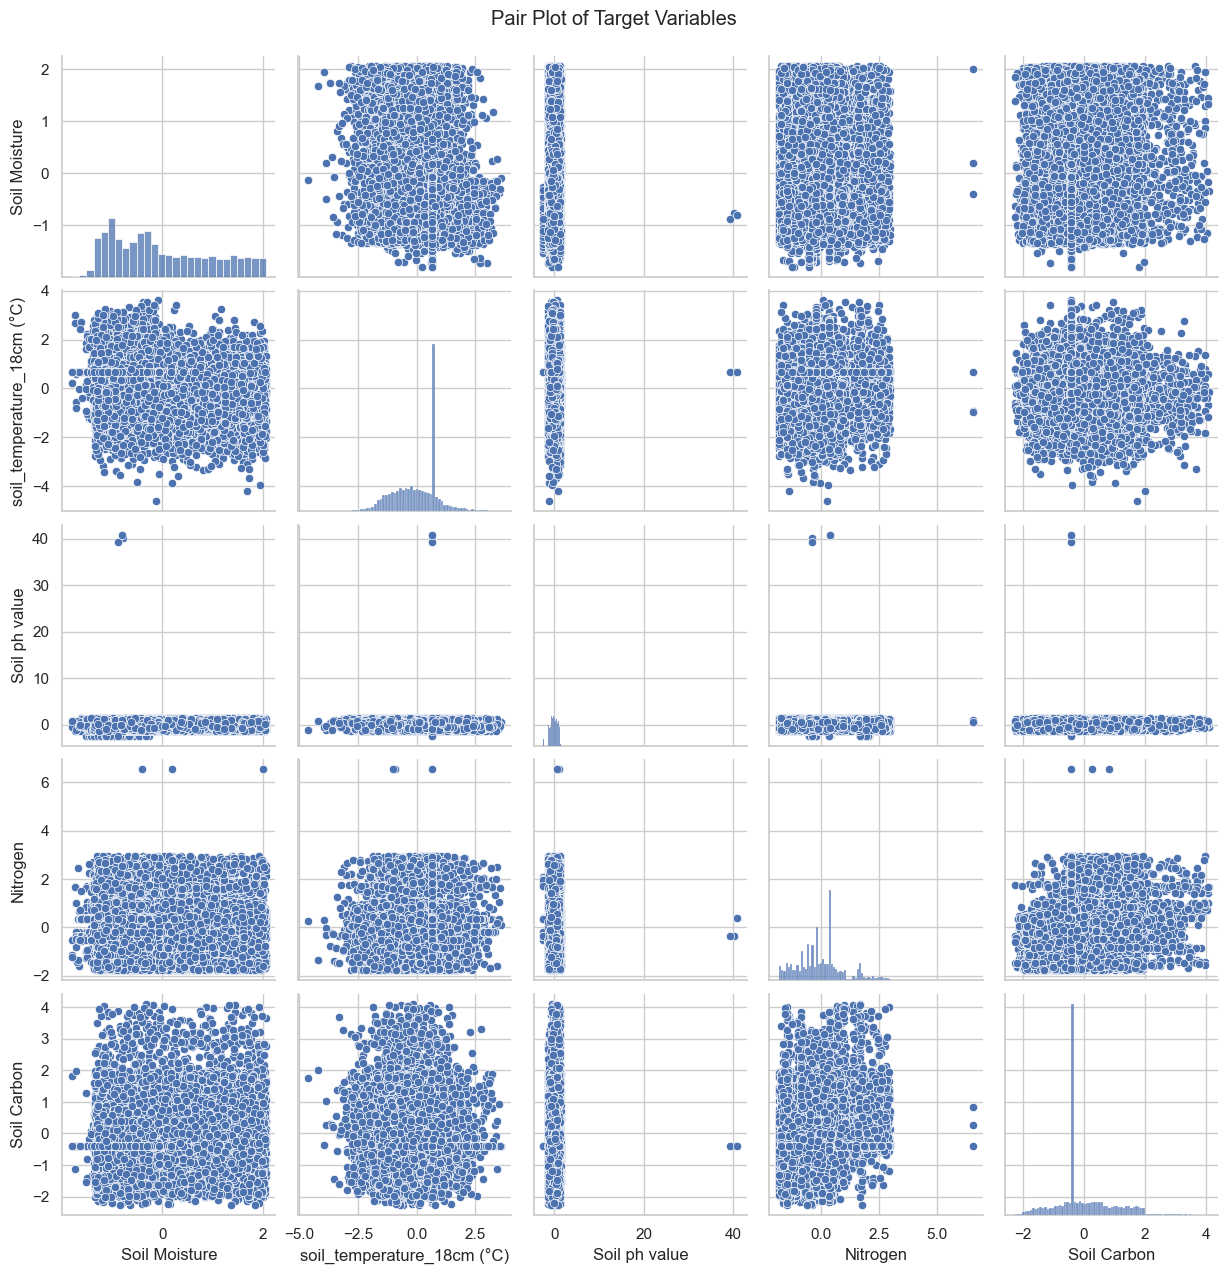

In [19]:
# 4. Pair Plot
sns.pairplot(soil[target_vars])
plt.suptitle('Pair Plot of Target Variables', y=1.02)
plt.show()

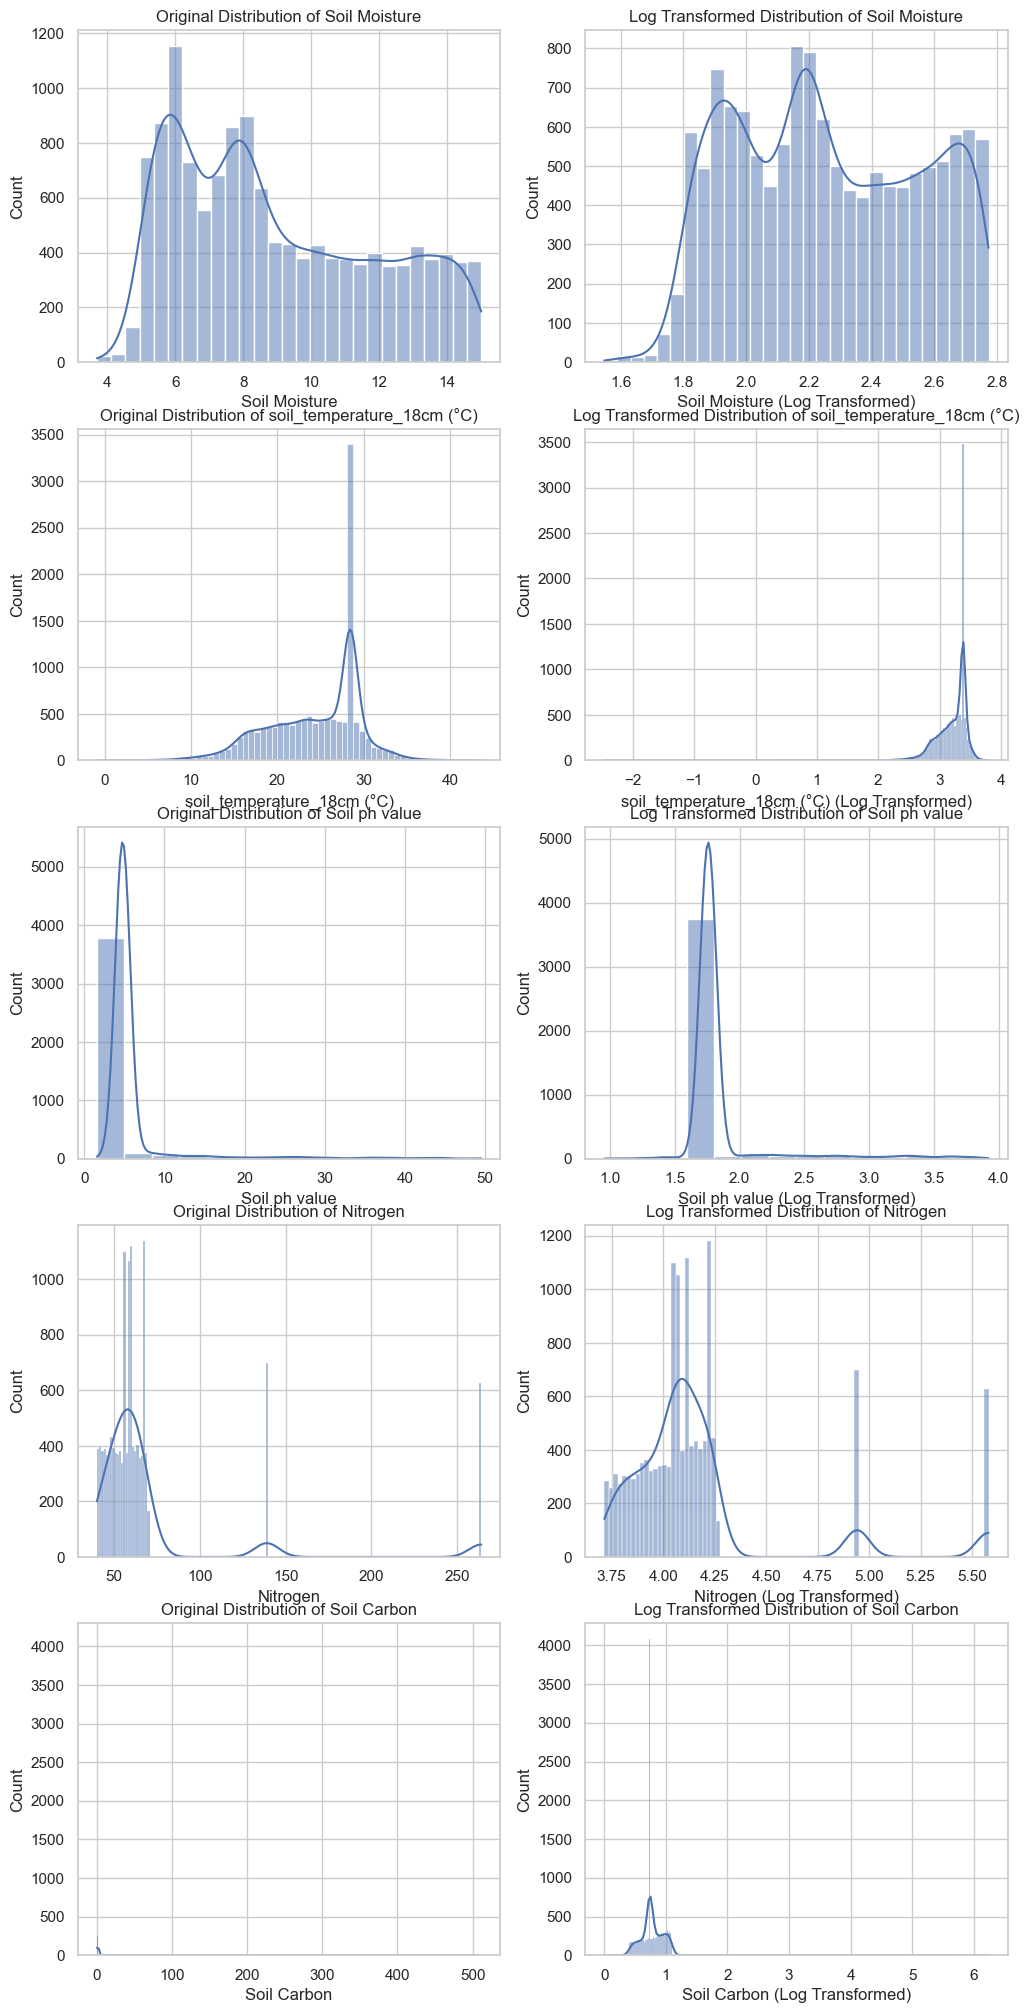

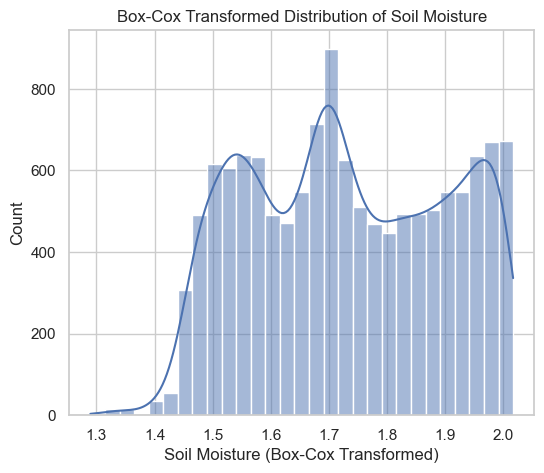

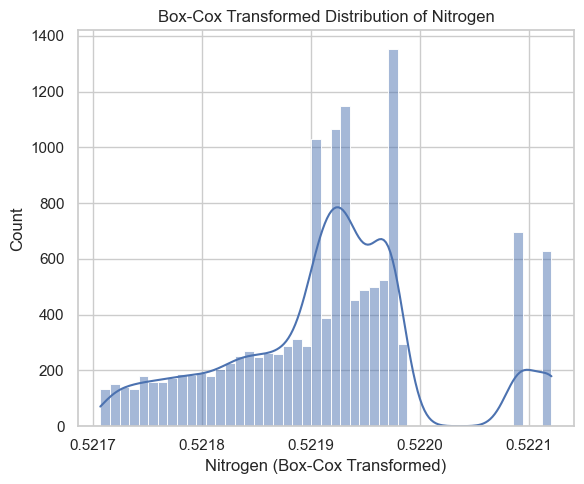

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
soil = pd.read_csv("final_merged_data.csv")

# List of target variables to transform
target_vars = ['Soil Moisture', 'soil_temperature_18cm (°C)', 'Soil ph value', 'Nitrogen', 'Soil Carbon']

# Function for log transformation
def log_transform(x):
    return np.log1p(x)  # log1p handles log(0) by using log(1 + x)

# Function for Box-Cox transformation
def boxcox_transform(x):
    return stats.boxcox(x + 1)  # Adding 1 to handle zero values

# Creating a figure to visualize the transformations
fig, axes = plt.subplots(len(target_vars), 2, figsize=(12, len(target_vars) * 5))

for ax, var in zip(axes, target_vars):
    # Original distribution
    sns.histplot(soil[var], kde=True, ax=ax[0])
    ax[0].set_title(f'Original Distribution of {var}')
    ax[0].set_xlabel(var)

    # Log transformation
    soil[f'{var}_log'] = log_transform(soil[var])
    sns.histplot(soil[f'{var}_log'], kde=True, ax=ax[1])
    ax[1].set_title(f'Log Transformed Distribution of {var}')
    ax[1].set_xlabel(f'{var} (Log Transformed)')

    # Optional: Box-Cox transformation
    if (soil[var] > 0).all():  # Check if all values are positive for Box-Cox
        soil[f'{var}_boxcox'], _ = boxcox_transform(soil[var])
        # Plot Box-Cox transformation
        fig, ax2 = plt.subplots(figsize=(6, 5))
        sns.histplot(soil[f'{var}_boxcox'], kde=True, ax=ax2)
        ax2.set_title(f'Box-Cox Transformed Distribution of {var}')
        ax2.set_xlabel(f'{var} (Box-Cox Transformed)')

plt.tight_layout()
plt.show()

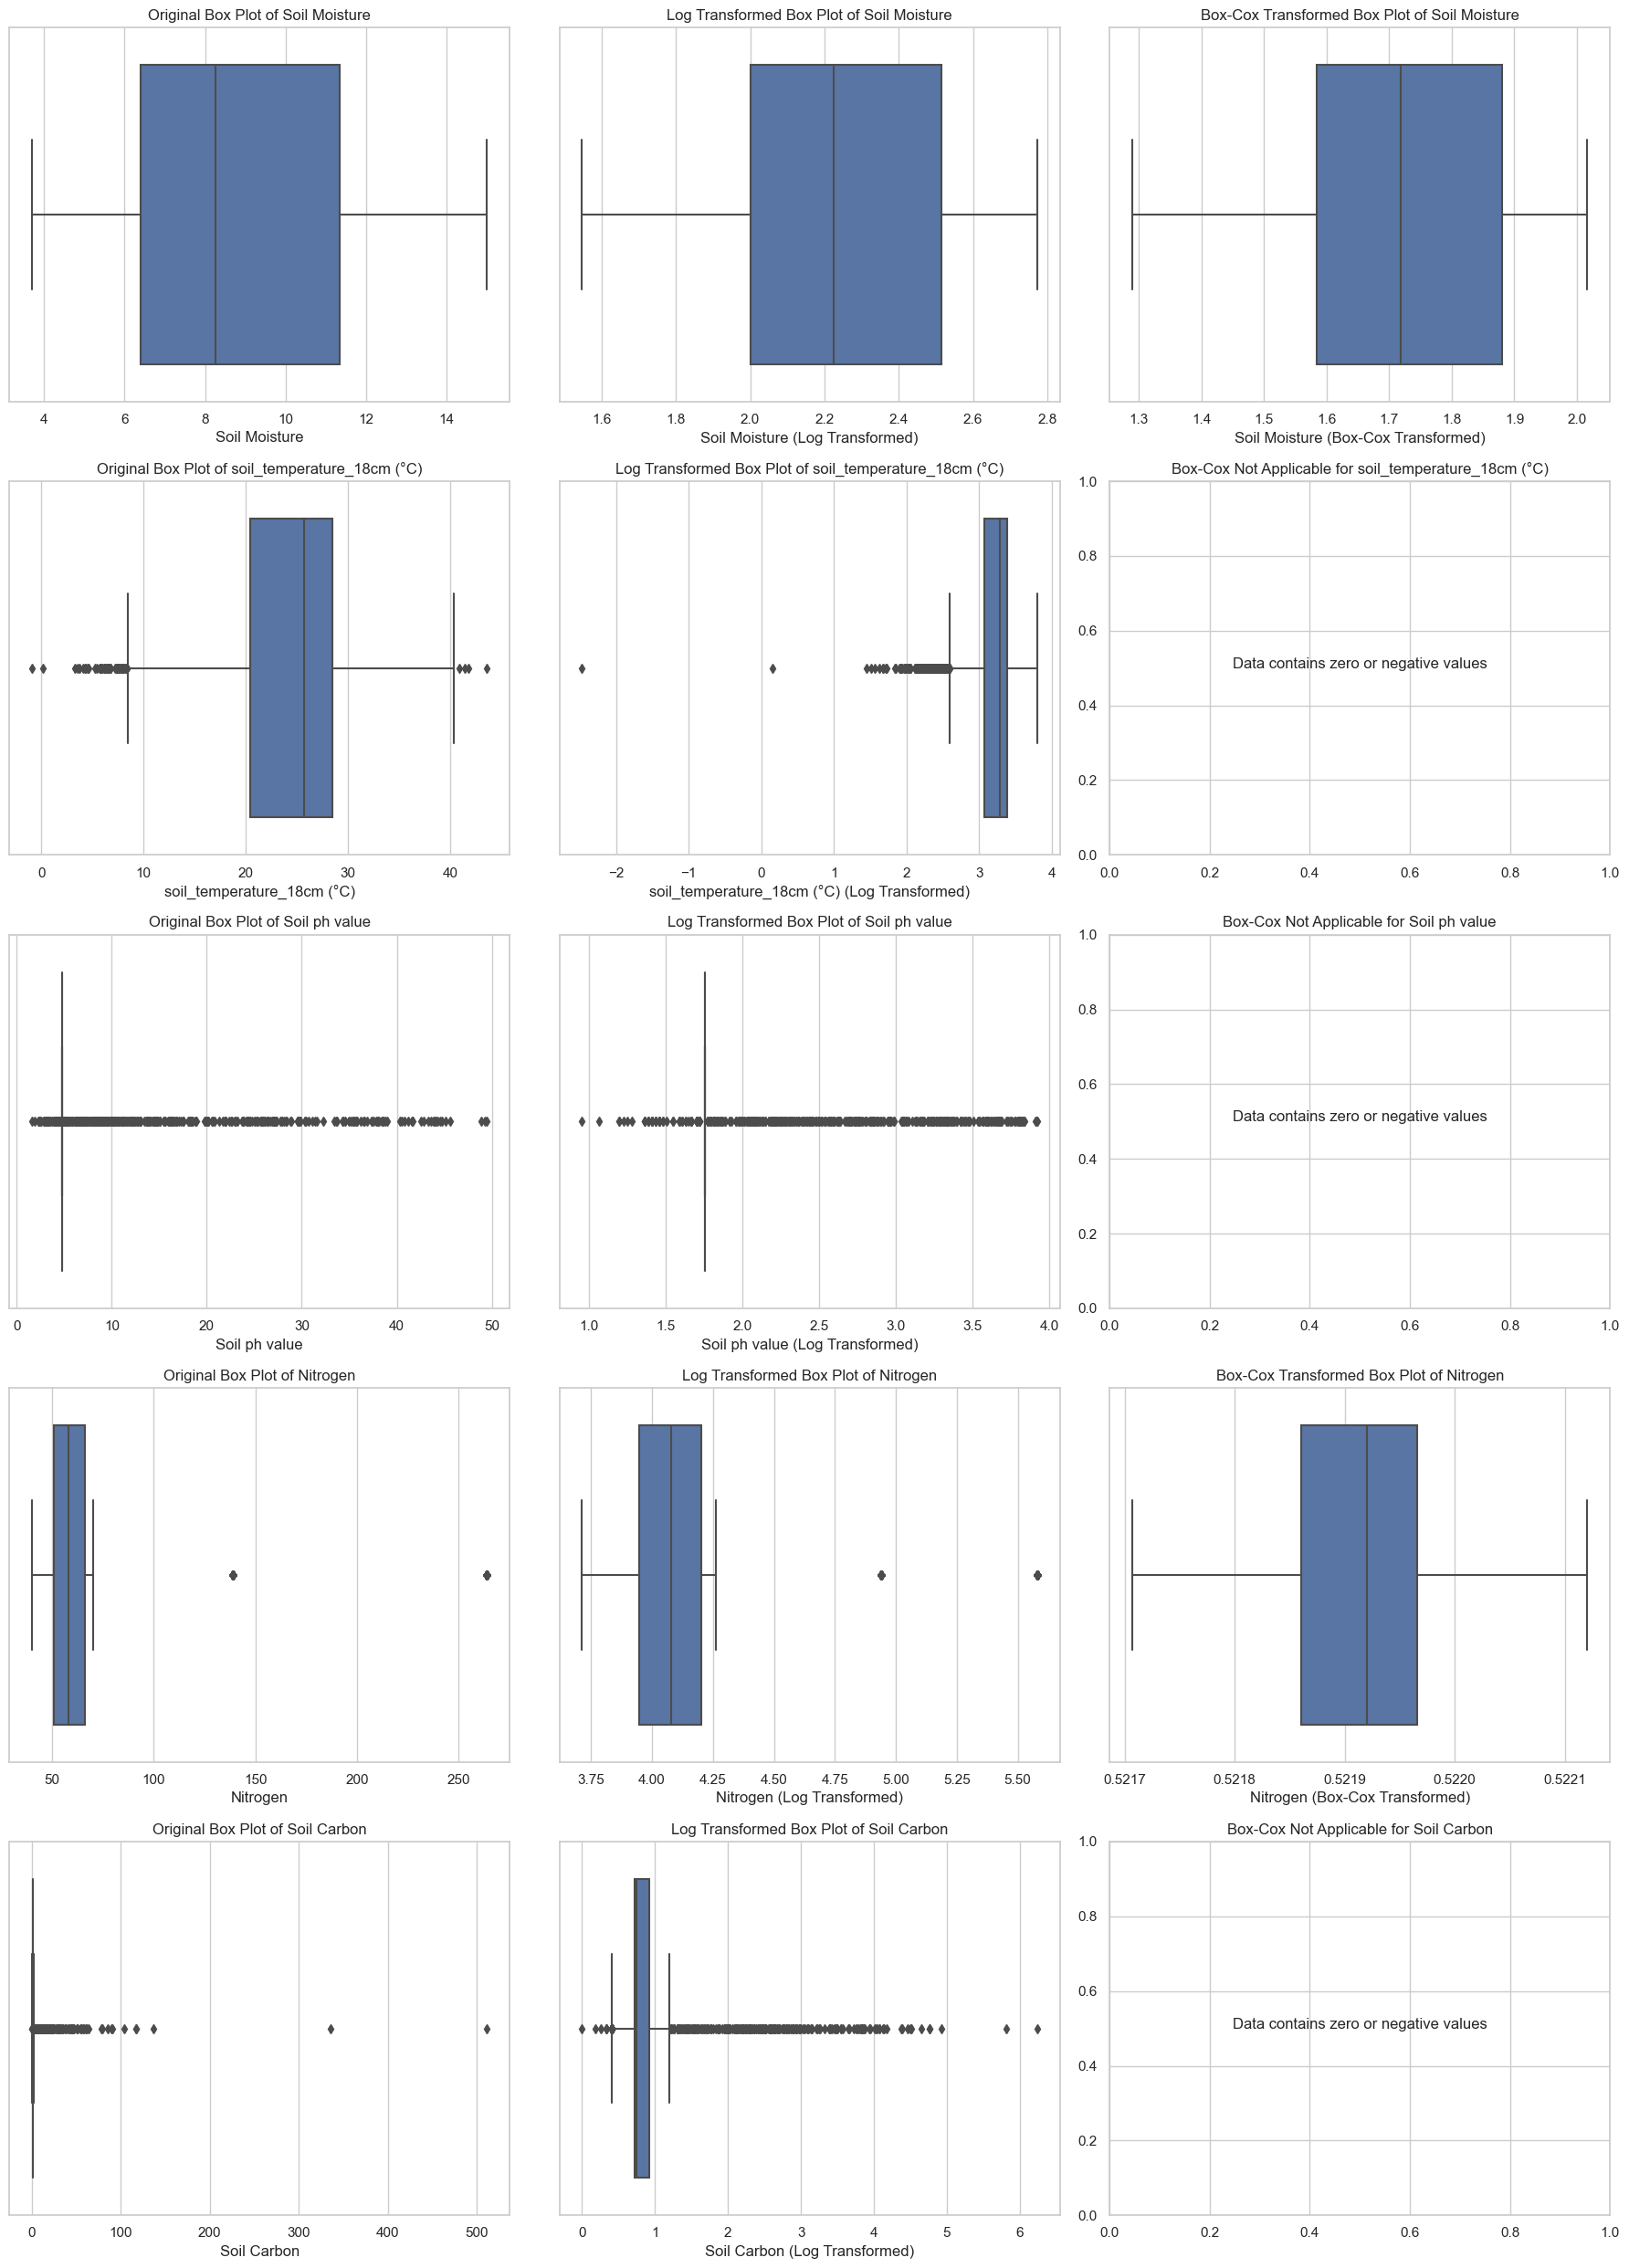

In [21]:
# List of target variables to transform
target_vars = ['Soil Moisture', 'soil_temperature_18cm (°C)', 'Soil ph value', 'Nitrogen', 'Soil Carbon']

# Function for log transformation
def log_transform(x):
    return np.log1p(x)  # log1p handles log(0) by using log(1 + x)

# Function for Box-Cox transformation
def boxcox_transform(x):
    return stats.boxcox(x + 1)  # Adding 1 to handle zero values

# Creating a figure to visualize the transformations
fig, axes = plt.subplots(len(target_vars), 3, figsize=(18, len(target_vars) * 5))

for ax, var in zip(axes, target_vars):
    # Original Box Plot
    sns.boxplot(x=soil[var], ax=ax[0])
    ax[0].set_title(f'Original Box Plot of {var}')
    ax[0].set_xlabel(var)

    # Log transformation
    soil[f'{var}_log'] = log_transform(soil[var])
    sns.boxplot(x=soil[f'{var}_log'], ax=ax[1])
    ax[1].set_title(f'Log Transformed Box Plot of {var}')
    ax[1].set_xlabel(f'{var} (Log Transformed)')

    # Box-Cox transformation
    if (soil[var] > 0).all():  # Check if all values are positive for Box-Cox
        soil[f'{var}_boxcox'], _ = boxcox_transform(soil[var])
        sns.boxplot(x=soil[f'{var}_boxcox'], ax=ax[2])
        ax[2].set_title(f'Box-Cox Transformed Box Plot of {var}')
        ax[2].set_xlabel(f'{var} (Box-Cox Transformed)')
    else:
        ax[2].set_title(f'Box-Cox Not Applicable for {var}')
        ax[2].text(0.5, 0.5, 'Data contains zero or negative values', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

## Data Splitting

In [22]:
# Preparing the data for modeling
X = soil.drop(columns=['Soil Moisture', 'soil_temperature_18cm (°C)', 'Soil ph value', 'Nitrogen', 'Soil Carbon'])
y = soil['Soil Moisture']  # Example target variable; you can change this

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1: ARIMA

ADF Statistic: -6.8499717391576835
p-value: 1.7041439995965122e-09
Critical Values:
   1%: -3.431933967096971
   5%: -2.862239909774808
   10%: -2.567142568380691
ADF Statistic: -17.97914865763355
p-value: 2.7786712017441816e-30
Critical Values:
   1%: -3.431935118952864
   5%: -2.862240418611436
   10%: -2.5671428392623077


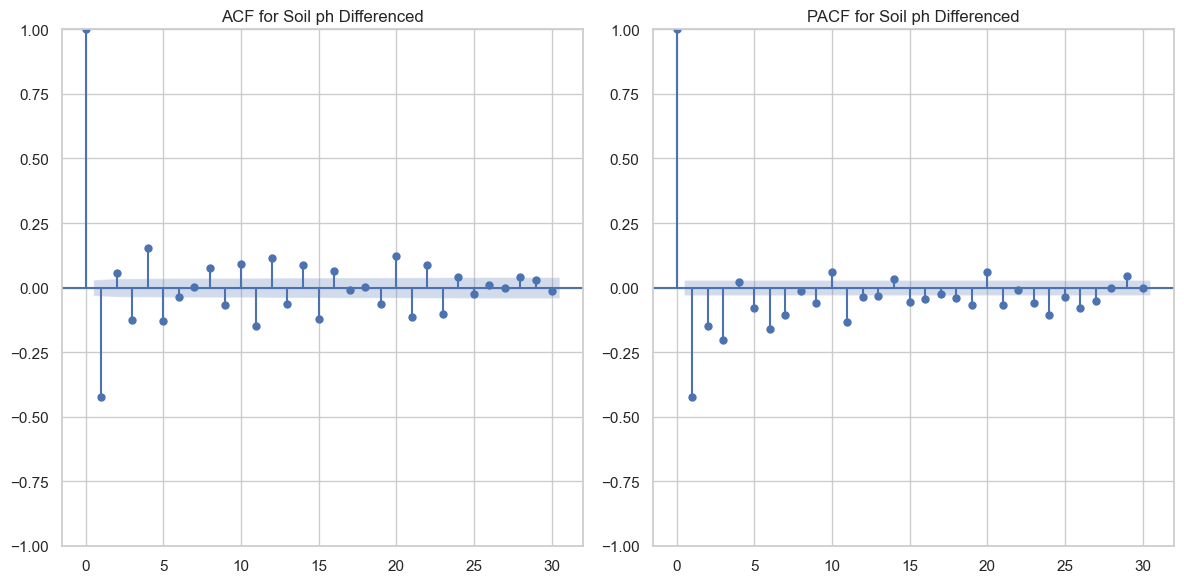

                               SARIMAX Results                                
Dep. Variable:          Soil ph value   No. Observations:                 4161
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11220.434
Date:                Sun, 24 Nov 2024   AIC                          22446.869
Time:                        17:44:32   BIC                          22465.869
Sample:                             0   HQIC                         22453.590
                               - 4161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2012      0.007     29.909      0.000       0.188       0.214
ma.L1         -0.7368      0.005   -151.026      0.000      -0.746      -0.727
sigma2        12.8898      0.068    189.661      0.0

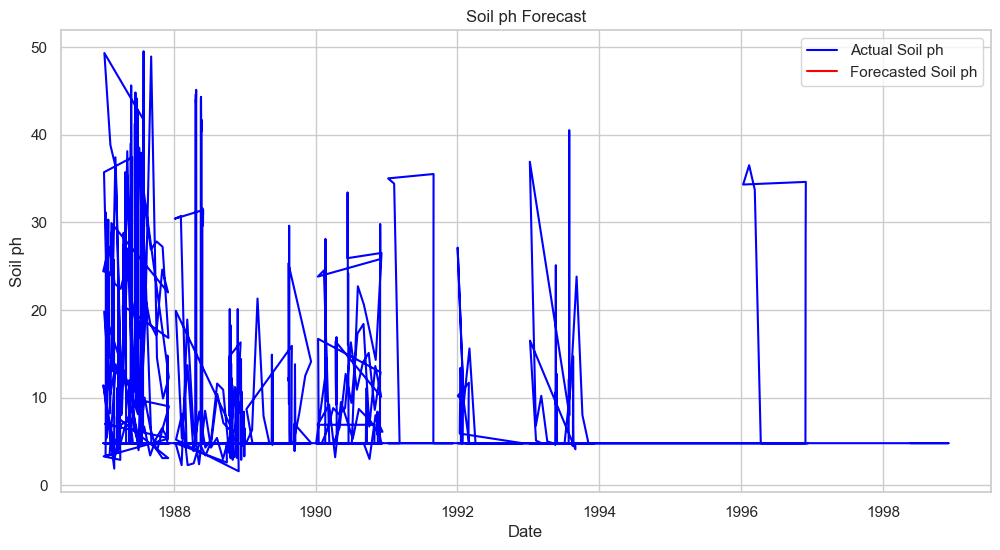

Mean Squared Error (MSE): 7.888609052210118e-31
Mean Absolute Error (MAE): 8.881784197001252e-16
Root Mean Squared Error (RMSE): 8.881784197001252e-16


In [23]:
# Ensure the 'Date' column is in datetime format
soil['Date'] = pd.to_datetime(soil['Date'])

# Step 0: Handle missing or infinite values in 'Soil ph value'
soil['Soil ph value'].replace([np.inf, -np.inf], np.nan, inplace=True)
soil.dropna(subset=['Soil ph value'], inplace=True)

# Step 1: Check for stationarity using the Augmented Dickey-Fuller test
def test_stationarity(ts):
    result = adfuller(ts)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Apply the test on 'Soil ph value'
test_stationarity(soil['Soil ph value'])

# Step 2: Differencing to make the series stationary if needed
soil['Soil ph_diff'] = soil['Soil ph value'].diff()
test_stationarity(soil['Soil ph_diff'].dropna())  # Re-test stationarity on differenced data

# Step 3: Visualize ACF and PACF to determine p and q
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(soil['Soil ph_diff'].dropna(), lags=30, ax=plt.gca())
plt.title('ACF for Soil ph Differenced')

plt.subplot(1, 2, 2)
plot_pacf(soil['Soil ph_diff'].dropna(), lags=30, ax=plt.gca())
plt.title('PACF for Soil ph Differenced')

plt.tight_layout()
plt.show()

# Step 4: Fit the ARIMA model (p, d, q)
model = ARIMA(soil['Soil ph value'], order=(1, 1, 1))
model_fit = model.fit()

# Step 5: Print the summary of the model
print(model_fit.summary())

# Step 6: Plot the forecasted values against actual values
# Forecasting
forecast_steps = 30  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Create a new DataFrame to hold the forecasted values
forecast_index = pd.date_range(start=soil['Date'].max() + pd.Timedelta(days=1), 
                                periods=forecast_steps, 
                                freq='D')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Soil ph'])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(soil['Date'], soil['Soil ph value'], label='Actual Soil ph', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted Soil ph'], label='Forecasted Soil ph', color='red')
plt.title('Soil ph Forecast')
plt.xlabel('Date')
plt.ylabel('Soil ph')
plt.legend()
plt.show()

# Step 7: Evaluate the model
# Calculate performance metrics
# Ensure there are enough actual values for comparison
if len(soil['Soil ph value']) >= forecast_steps:
    actual_values = soil['Soil ph value'][-forecast_steps:]  # Get actual values for the forecast period
    mse = mean_squared_error(actual_values, forecast[:len(actual_values)])
    mae = mean_absolute_error(actual_values, forecast[:len(actual_values)])
    rmse = np.sqrt(mse)

    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
else:
    print("Not enough actual values to calculate metrics.")

In [24]:
import itertools

# Define the p, d, q parameters to take values between
p = d = q = range(0, 3)  # Example ranges; adjust as needed

# Generate all different combinations of p, d, q
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_pdq = None

# Iterate through the combinations
for param in pdq:
    try:
        model = ARIMA(soil['Soil ph value'], order=param)
        results = model.fit()
        
        # Compare AIC values to find the best model
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            
    except:
        continue

print(f'Best ARIMA{best_pdq} AIC: {best_aic}')

/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

Best ARIMA(2, 0, 2) AIC: 22241.333157479865


In [25]:
# Fit the ARIMA model with the best parameters
best_model = ARIMA(soil['Soil ph value'], order=(0, 1, 1))
best_model_fit = best_model.fit()

# Print the summary of the best model
print(best_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:          Soil ph value   No. Observations:                 4161
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -11233.848
Date:                Sun, 24 Nov 2024   AIC                          22471.696
Time:                        17:44:40   BIC                          22484.362
Sample:                             0   HQIC                         22476.177
                               - 4161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5704      0.004   -151.894      0.000      -0.578      -0.563
sigma2        12.9736      0.065    198.683      0.000      12.846      13.102
Ljung-Box (L1) (Q):                   3.84   Jarque-

In [26]:
# Fit the ARIMA model with the best parameters
best_model = ARIMA(soil['Soil ph value'], order=(0, 1, 1))
best_model_fit = best_model.fit()

# Print the summary of the best model
print(best_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:          Soil ph value   No. Observations:                 4161
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -11233.848
Date:                Sun, 24 Nov 2024   AIC                          22471.696
Time:                        17:44:40   BIC                          22484.362
Sample:                             0   HQIC                         22476.177
                               - 4161                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5704      0.004   -151.894      0.000      -0.578      -0.563
sigma2        12.9736      0.065    198.683      0.000      12.846      13.102
Ljung-Box (L1) (Q):                   3.84   Jarque-

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Forecast the next 'forecast_steps' values
forecast_steps = 30  # Number of steps to forecast
forecast = best_model_fit.forecast(steps=forecast_steps)

# Step 2: Prepare actual values for the forecast period
actual_values = soil['Soil ph value'][-forecast_steps:].values  # Get actual values for the forecast period

# Step 3: Calculate MSE, MAE, and RMSE
mse = mean_squared_error(actual_values, forecast)
mae = mean_absolute_error(actual_values, forecast)
rmse = np.sqrt(mse)

# Step 4: Print the metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 7.888609052210118e-31
Mean Absolute Error (MAE): 8.881784197001252e-16
Root Mean Squared Error (RMSE): 8.881784197001252e-16


## Model 2: Linear Regression

In [28]:
# Step 1: Convert 'Date' to datetime format and create Year, Month, Day columns
soil['Date'] = pd.to_datetime(soil['Date'])
soil['Year'] = soil['Date'].dt.year
soil['Month'] = soil['Date'].dt.month
soil['Day'] = soil['Date'].dt.day

# Step 2: Prepare the data
features = [
    'Temperature (°C)', 
    'Humidity (%)', 
    'Precipitation (mm)', 
    'Dewpoint (°C)', 
    'Windspeed (m/s)', 
    'Evapotranspiration (mm)', 
    'Soil Type',  # This will be converted to dummy variables
    'Soil Carbon', 
    'Nitrogen', 
    'Year', 
    'Month', 
    'Day',
    'soil_temperature_18cm (°C)',
    'Soil Moisture',
    'Wind Gusts (m/s)',
    'Cloudcover (%)'
]

X = soil[features]
y = soil['Soil ph value']

# Step 3: Handle categorical variables
X = pd.get_dummies(X, columns=['Soil Type'], drop_first=True)

# Step 4: Handle missing values (using median imputation)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 6: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Step 8: Make predictions
y_pred = linear_model.predict(X_test_scaled)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Step 10: Print the metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Optional: Print model coefficients and intercept
print('Coefficients:', linear_model.coef_)
print('Intercept:', linear_model.intercept_)

Mean Squared Error (MSE): 27.460934324295415
Mean Absolute Error (MAE): 2.4501991363563502
Root Mean Squared Error (RMSE): 5.2403181510568055
Coefficients: [-0.06742205 -0.14770564 -0.28251135 -0.11187113  0.1883005  -0.20515314
  0.56901816 -0.05984868 -1.39598194 -0.3076269   0.12430377  0.52940154
 -0.00275002  0.61479975 -0.22604674  0.74144007  0.20522186  0.38474068
  0.4557232  -0.16456928  0.31883129]
Intercept: 5.878064903846562


## Model 3: Random Forest

In [29]:
from sklearn.impute import SimpleImputer

# Step 1: Convert 'Date' to datetime format and create Year, Month, Day columns
soil['Date'] = pd.to_datetime(soil['Date'])
soil['Year'] = soil['Date'].dt.year
soil['Month'] = soil['Date'].dt.month
soil['Day'] = soil['Date'].dt.day

# Step 2: Prepare the data
features = [
    'Temperature (°C)', 
    'Humidity (%)', 
    'Precipitation (mm)', 
    'Dewpoint (°C)', 
    'Windspeed (m/s)', 
    'Evapotranspiration (mm)', 
    'Soil Type',  # This will be converted to dummy variables
    'Soil Carbon', 
    'Nitrogen', 
    'Year', 
    'Month', 
    'Day',
    'soil_temperature_18cm (°C)',
    'Soil Moisture',
    'Wind Gusts (m/s)',
    'Cloudcover (%)'
]

X = soil[features]
y = soil['Soil ph value']

# Step 3: Handle categorical variables
X = pd.get_dummies(X, columns=['Soil Type'], drop_first=True)

# Step 4: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='median')  # You can use 'mean', 'most_frequent', or other strategies
X_imputed = imputer.fit_transform(X)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 6: Scale the features (optional for Random Forest, but you can still do it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 8: Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Step 9: Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Step 10: Print the metrics
print(f'Random Forest Regression Metrics:')
print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'Mean Absolute Error (MAE): {mae_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')

# Optional: Print feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Random Forest Regression Metrics:
Mean Squared Error (MSE): 11.661815165666265
Mean Absolute Error (MAE): 1.0879651860744504
Root Mean Squared Error (RMSE): 3.414939994445915

Feature Importances:
                       Feature  Importance
2           Precipitation (mm)    0.237559
6                  Soil Carbon    0.148303
16         Soil Type_Clay Loam    0.101087
5      Evapotranspiration (mm)    0.092270
11  soil_temperature_18cm (°C)    0.065907
12               Soil Moisture    0.057638
10                         Day    0.055743
9                        Month    0.050379
13            Wind Gusts (m/s)    0.044666
14              Cloudcover (%)    0.036613
7                     Nitrogen    0.034919
8                         Year    0.020147
1                 Humidity (%)    0.017799
4              Windspeed (m/s)    0.013442
3                Dewpoint (°C)    0.010986
0             Temperature (°C)    0.005862
15              Soil Type_Clay    0.003992
20         Soil Type_Silt Loa

In [30]:
# Step 1: Convert 'Date' to datetime format and create Year, Month, Day columns
soil['Date'] = pd.to_datetime(soil['Date'])
soil['Year'] = soil['Date'].dt.year
soil['Month'] = soil['Date'].dt.month
soil['Day'] = soil['Date'].dt.day

# Step 2: Prepare the data
features = [
    'Temperature (°C)', 
    'Humidity (%)', 
    'Precipitation (mm)', 
    'Dewpoint (°C)', 
    'Windspeed (m/s)', 
    'Evapotranspiration (mm)', 
    'Soil Type',  # This will be converted to dummy variables
    'Soil Carbon', 
    'Nitrogen', 
    'Year', 
    'Month', 
    'Day',
    'soil_temperature_18cm (°C)',
    'Soil Moisture',
    'Wind Gusts (m/s)',
    'Cloudcover (%)'
]

X = soil[features]
y = soil['Soil ph value']

# Step 3: Handle categorical variables
X = pd.get_dummies(X, columns=['Soil Type'], drop_first=True)

# Step 4: Handle missing values (NaNs) and convert back to DataFrame
imputer = SimpleImputer(strategy='median')  # You can use 'median' or other strategies if preferred
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame with the original column names
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 6: Scale the features (optional for Random Forest, but still done here)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Step 7: Define the Random Forest model and hyperparameter distribution
rf_model = RandomForestRegressor(random_state=42)

param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt'],  # Replaced 'auto' with None
}

# Step 8: Implement RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, 
                                   param_distributions=param_distributions, 
                                   n_iter=50,  # Number of parameter settings to sample
                                   cv=5, 
                                   n_jobs=-1, 
                                   verbose=2,
                                   scoring='neg_mean_squared_error',
                                   random_state=42)

# Step 9: Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Step 10: Best hyperparameters and model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Step 11: Make predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Step 12: Evaluate the best model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)

# Step 13: Print the best parameters and metrics
print(f'Best Hyperparameters: {best_params}')
print(f'Best Random Forest Regression Metrics:')
print(f'Mean Squared Error (MSE): {mse_best_rf}')
print(f'Mean Absolute Error (MAE): {mae_best_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_best_rf}')

# Step 14: Print feature importances of the best model
importances_best = best_rf_model.feature_importances_
feature_importance_df_best = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_best})
feature_importance_df_best = feature_importance_df_best.sort_values(by='Importance', ascending=False)

print("\nFeature Importances for Best Model:")
print(feature_importance_df_best)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best Random Forest Regression Metrics:
Mean Squared Error (MSE): 11.981609466986795
Mean Absolute Error (MAE): 1.1454741896758813
Root Mean Squared Error (RMSE): 3.4614461525476306

Feature Importances for Best Model:
                       Feature  Importance
2           Precipitation (mm)    0.139021
6                  Soil Carbon    0.107710
13            Wind Gusts (m/s)    0.092219
11  soil_temperature_18cm (°C)    0.087780
12               Soil Moisture    0.064505
8                         Year    0.062838
10                         Day    0.060939
5      Evapotranspiration (mm)    0.059746
9                        Month    0.051494
1                 Humidity (%)    0.051305
14              Cloudcover (%)    0.049286
4              Windspeed (m/s)    0.040728
7                     Nitroge

## Model 4: Decision Tree

In [31]:
# Step 1: Convert 'Date' to datetime format and create Year, Month, Day columns
soil['Date'] = pd.to_datetime(soil['Date'])
soil['Year'] = soil['Date'].dt.year
soil['Month'] = soil['Date'].dt.month
soil['Day'] = soil['Date'].dt.day

# Step 2: Prepare the data
features = [
    'Temperature (°C)', 
    'Humidity (%)', 
    'Precipitation (mm)', 
    'Dewpoint (°C)', 
    'Windspeed (m/s)', 
    'Evapotranspiration (mm)', 
    'Soil Type',  # This will be converted to dummy variables
    'Soil Carbon', 
    'Nitrogen', 
    'Year', 
    'Month', 
    'Day',
    'soil_temperature_18cm (°C)',
    'Soil Moisture',
    'Wind Gusts (m/s)',
    'Cloudcover (%)'
]

X = soil[features]
y = soil['Soil ph value']

# Step 3: Handle categorical variables
X = pd.get_dummies(X, columns=['Soil Type'], drop_first=True)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale the features (optional for Decision Tree, but you can still do it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Fit the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Step 8: Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Step 9: Print the metrics
print(f'Decision Tree Regression Metrics:')
print(f'Mean Squared Error (MSE): {mse_dt}')
print(f'Mean Absolute Error (MAE): {mae_dt}')
print(f'Root Mean Squared Error (RMSE): {rmse_dt}')

Decision Tree Regression Metrics:
Mean Squared Error (MSE): 22.250048019207686
Mean Absolute Error (MAE): 1.236854741896818
Root Mean Squared Error (RMSE): 4.71699565605139


In [32]:
# Step 1: Convert 'Date' to datetime format and create Year, Month, Day columns
soil['Date'] = pd.to_datetime(soil['Date'])
soil['Year'] = soil['Date'].dt.year
soil['Month'] = soil['Date'].dt.month
soil['Day'] = soil['Date'].dt.day

# Step 2: Prepare the data
features = [
    'Temperature (°C)', 
    'Humidity (%)', 
    'Precipitation (mm)', 
    'Dewpoint (°C)', 
    'Windspeed (m/s)', 
    'Evapotranspiration (mm)', 
    'Soil Type',  # This will be converted to dummy variables
    'Soil Carbon', 
    'Nitrogen', 
    'Year', 
    'Month', 
    'Day',
    'soil_temperature_18cm (°C)',
    'Soil Moisture',
    'Wind Gusts (m/s)',
    'Cloudcover (%)'
]

X = soil[features]
y = soil['Soil ph value']

# Step 3: Handle categorical variables
X = pd.get_dummies(X, columns=['Soil Type'], drop_first=True)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale the features (optional for Decision Tree, but you can still do it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Define the Decision Tree model and the hyperparameter distribution
dt_model = DecisionTreeRegressor(random_state=42)

param_distributions_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

# Step 7: Implement RandomizedSearchCV for Decision Tree
random_search_dt = RandomizedSearchCV(estimator=dt_model, 
                                       param_distributions=param_distributions_dt, 
                                       n_iter=50,  # Number of parameter settings to sample
                                       cv=5, 
                                       n_jobs=-1, 
                                       verbose=2,
                                       scoring='neg_mean_squared_error',
                                       random_state=42)

# Step 8: Fit RandomizedSearchCV
random_search_dt.fit(X_train_scaled, y_train)

# Step 9: Best hyperparameters and model
best_params_dt = random_search_dt.best_params_
best_dt_model = random_search_dt.best_estimator_

# Step 10: Make predictions with the best model
y_pred_best_dt = best_dt_model.predict(X_test_scaled)

# Step 11: Evaluate the best model
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
mae_best_dt = mean_absolute_error(y_test, y_pred_best_dt)
rmse_best_dt = np.sqrt(mse_best_dt)

# Step 12: Print the best parameters and metrics
print(f'Best Hyperparameters for Decision Tree: {best_params_dt}')
print(f'Best Decision Tree Regression Metrics:')
print(f'Mean Squared Error (MSE): {mse_best_dt}')
print(f'Mean Absolute Error (MAE): {mae_best_dt}')
print(f'Root Mean Squared Error (RMSE): {rmse_best_dt}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best Decision Tree Regression Metrics:
Mean Squared Error (MSE): 18.32090552892358
Mean Absolute Error (MAE): 1.1281564054193498
Root Mean Squared Error (RMSE): 4.2802926919690405


/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
115 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_paramete

## Model 5: XGBoost

XGBoost Regression Metrics:
Mean Squared Error (MSE): 12.377642904722714
Mean Absolute Error (MAE): 1.123369247715871
Root Mean Squared Error (RMSE): 3.5181874459333056


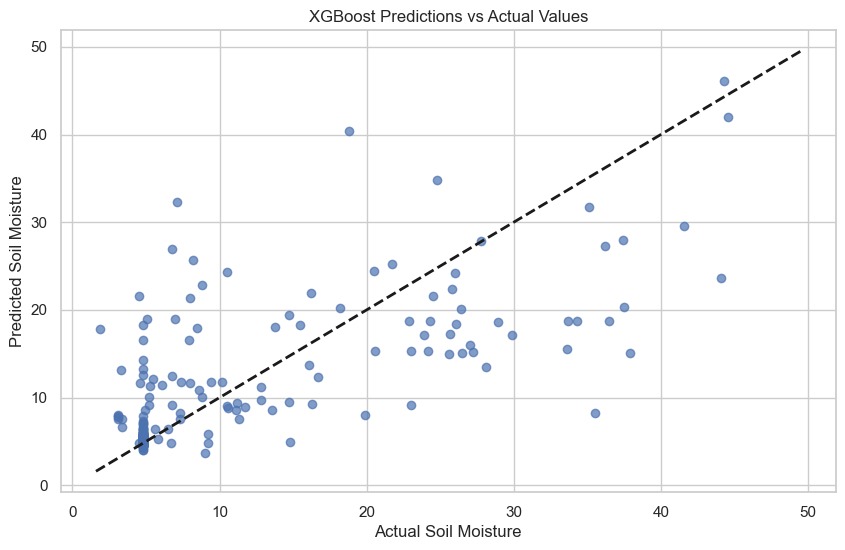

In [33]:
# Step 1: Convert 'Date' to datetime format and create Year, Month, Day columns
soil['Date'] = pd.to_datetime(soil['Date'])
soil['Year'] = soil['Date'].dt.year
soil['Month'] = soil['Date'].dt.month
soil['Day'] = soil['Date'].dt.day

# Step 2: Prepare the data
features = [
    'Temperature (°C)', 
    'Humidity (%)', 
    'Precipitation (mm)', 
    'Dewpoint (°C)', 
    'Windspeed (m/s)', 
    'Evapotranspiration (mm)', 
    'Soil Type',  # This will be converted to dummy variables
    'Soil Carbon', 
    'Nitrogen', 
    'Year', 
    'Month', 
    'Day',
    'soil_temperature_18cm (°C)',
    'Soil Moisture',
    'Wind Gusts (m/s)',
    'Cloudcover (%)'
]

X = soil[features]
y = soil['Soil ph value']

# Step 3: Handle categorical variables
X = pd.get_dummies(X, columns=['Soil Type'], drop_first=True)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale the features (optional for tree-based methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Fit the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Step 8: Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Step 9: Print the metrics
print(f'XGBoost Regression Metrics:')
print(f'Mean Squared Error (MSE): {mse_xgb}')
print(f'Mean Absolute Error (MAE): {mae_xgb}')
print(f'Root Mean Squared Error (RMSE): {rmse_xgb}')

# Optional: If you want to visualize predictions against actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line of equality
plt.xlabel('Actual Soil Moisture')
plt.ylabel('Predicted Soil Moisture')
plt.title('XGBoost Predictions vs Actual Values')
plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for XGBoost: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.5}
Best XGBoost Regression Metrics:
Mean Squared Error (MSE): 13.280930860266892
Mean Absolute Error (MAE): 1.2220581627121063
Root Mean Squared Error (RMSE): 3.644301148405122


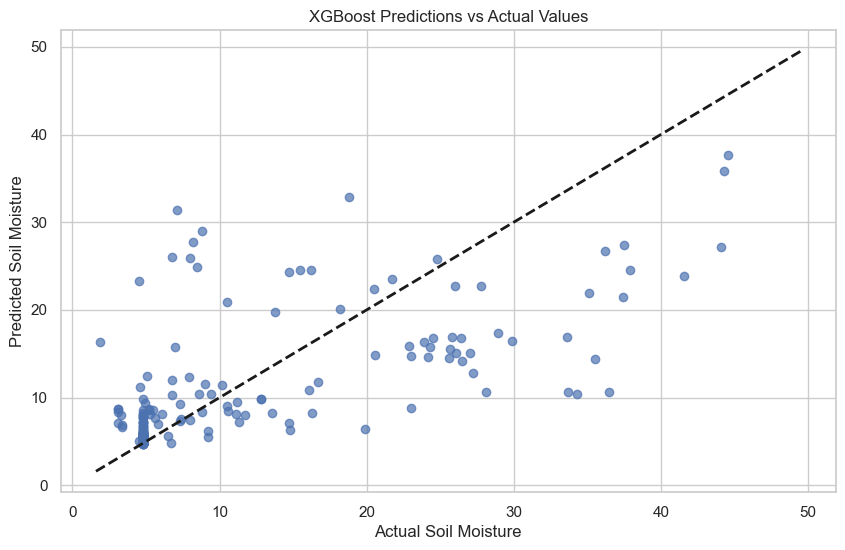

In [34]:
# Step 1: Convert 'Date' to datetime format and create Year, Month, Day columns
soil['Date'] = pd.to_datetime(soil['Date'])
soil['Year'] = soil['Date'].dt.year
soil['Month'] = soil['Date'].dt.month
soil['Day'] = soil['Date'].dt.day

# Step 2: Prepare the data
features = [
    'Temperature (°C)', 
    'Humidity (%)', 
    'Precipitation (mm)', 
    'Dewpoint (°C)', 
    'Windspeed (m/s)', 
    'Evapotranspiration (mm)', 
    'Soil Type',  # This will be converted to dummy variables
    'Soil Carbon', 
    'Nitrogen', 
    'Year', 
    'Month', 
    'Day',
    'soil_temperature_18cm (°C)',
    'Soil Moisture',
    'Wind Gusts (m/s)',
    'Cloudcover (%)'
]

X = soil[features]
y = soil['Soil ph value']

# Step 3: Handle categorical variables
X = pd.get_dummies(X, columns=['Soil Type'], drop_first=True)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale the features (optional for tree-based methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Define the XGBoost model and the hyperparameter distribution
xgb_model = XGBRegressor()

param_distributions_xgb = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7, 9],  # Maximum tree depth
    'subsample': [0.5, 0.7, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.5, 0.7, 1.0],  # Subsample ratio of columns when constructing each tree
}

# Step 7: Implement RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, 
                                        param_distributions=param_distributions_xgb, 
                                        n_iter=50,  # Number of parameter settings to sample
                                        cv=5, 
                                        n_jobs=-1, 
                                        verbose=2,
                                        scoring='neg_mean_squared_error',
                                        random_state=42)

# Step 8: Fit RandomizedSearchCV
random_search_xgb.fit(X_train_scaled, y_train)

# Step 9: Best hyperparameters and model
best_params_xgb = random_search_xgb.best_params_
best_xgb_model = random_search_xgb.best_estimator_

# Step 10: Make predictions with the best model
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)

# Step 11: Evaluate the best model
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)

# Step 12: Print the best parameters and metrics
print(f'Best Hyperparameters for XGBoost: {best_params_xgb}')
print(f'Best XGBoost Regression Metrics:')
print(f'Mean Squared Error (MSE): {mse_best_xgb}')
print(f'Mean Absolute Error (MAE): {mae_best_xgb}')
print(f'Root Mean Squared Error (RMSE): {rmse_best_xgb}')

# Optional: Visualize predictions against actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_xgb, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line of equality
plt.xlabel('Actual Soil Moisture')
plt.ylabel('Predicted Soil Moisture')
plt.title('XGBoost Predictions vs Actual Values')
plt.show()

## Model 6: Gradient Boost Regressor

Gradient Boosting Regression Metrics:
Mean Squared Error (MSE): 11.618367583475406
Mean Absolute Error (MAE): 1.1122432551501467
Root Mean Squared Error (RMSE): 3.4085726607299143


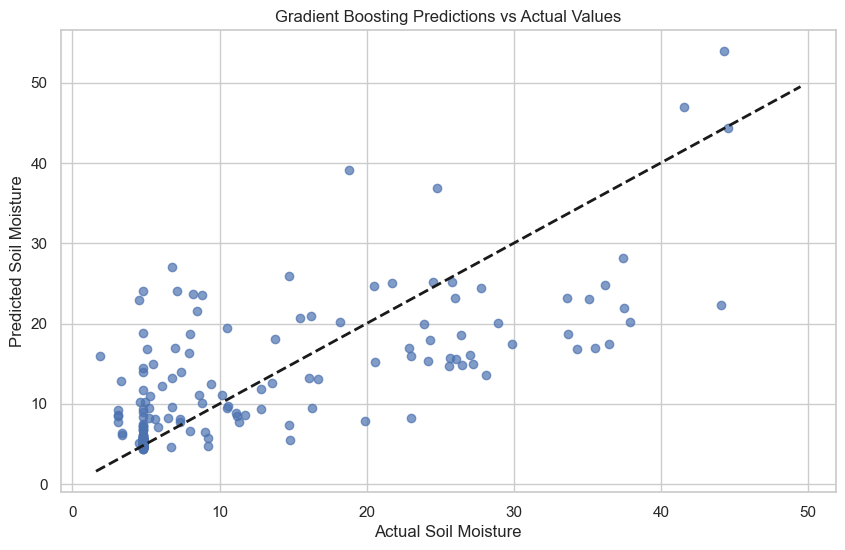

In [35]:
# Step 1: Convert 'Date' to datetime format and create Year, Month, Day columns
soil['Date'] = pd.to_datetime(soil['Date'])
soil['Year'] = soil['Date'].dt.year
soil['Month'] = soil['Date'].dt.month
soil['Day'] = soil['Date'].dt.day

# Step 2: Prepare the data
features = [
    'Temperature (°C)', 
    'Humidity (%)', 
    'Precipitation (mm)', 
    'Dewpoint (°C)', 
    'Windspeed (m/s)', 
    'Evapotranspiration (mm)', 
    'Soil Type',  # This will be converted to dummy variables
    'Soil Carbon', 
    'Nitrogen', 
    'Year', 
    'Month', 
    'Day',
    'soil_temperature_18cm (°C)',
    'Soil Moisture',
    'Wind Gusts (m/s)',
    'Cloudcover (%)'
]

X = soil[features]
y = soil['Soil ph value']

# Step 3: Handle categorical variables
X = pd.get_dummies(X, columns=['Soil Type'], drop_first=True)

# Step 4: Handle missing values
imputer = SimpleImputer(strategy='mean')  # Use mean to fill missing values
X = imputer.fit_transform(X)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale the features (optional for tree-based methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Fit the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Step 8: Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Step 9: Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

# Step 10: Print the metrics
print(f'Gradient Boosting Regression Metrics:')
print(f'Mean Squared Error (MSE): {mse_gb}')
print(f'Mean Absolute Error (MAE): {mae_gb}')
print(f'Root Mean Squared Error (RMSE): {rmse_gb}')

# Optional: Visualize predictions against actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line of equality
plt.xlabel('Actual Soil Moisture')
plt.ylabel('Predicted Soil Moisture')
plt.title('Gradient Boosting Predictions vs Actual Values')
plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for Gradient Boosting: {'subsample': 0.5, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.01}
Best Gradient Boosting Regression Metrics:
Mean Squared Error (MSE): 11.550164069022633
Mean Absolute Error (MAE): 1.206371265329926
Root Mean Squared Error (RMSE): 3.3985532317476848


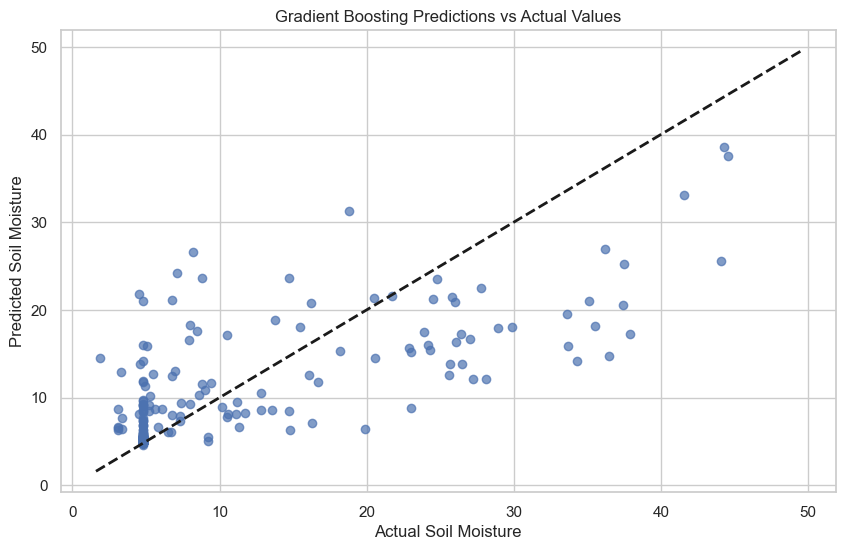

In [36]:
# Step 1: Convert 'Date' to datetime format and create Year, Month, Day columns
soil['Date'] = pd.to_datetime(soil['Date'])
soil['Year'] = soil['Date'].dt.year
soil['Month'] = soil['Date'].dt.month
soil['Day'] = soil['Date'].dt.day

# Step 2: Prepare the data
features = [
    'Temperature (°C)', 
    'Humidity (%)', 
    'Precipitation (mm)', 
    'Dewpoint (°C)', 
    'Windspeed (m/s)', 
    'Evapotranspiration (mm)', 
    'Soil Type',  # This will be converted to dummy variables
    'Soil Carbon', 
    'Nitrogen', 
    'Year', 
    'Month', 
    'Day',
    'soil_temperature_18cm (°C)',
    'Soil Moisture',
    'Wind Gusts (m/s)',
    'Cloudcover (%)'
]

X = soil[features]
y = soil['Soil ph value']

# Step 3: Handle categorical variables
X = pd.get_dummies(X, columns=['Soil Type'], drop_first=True)

# Step 4: Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X = imputer.fit_transform(X)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale the features (optional for tree-based methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Define the Gradient Boosting model and the hyperparameter distribution
gb_model = GradientBoostingRegressor()

param_distributions_gb = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7, 9],  # Maximum tree depth
    'subsample': [0.5, 0.7, 1.0],  # Subsample ratio of the training instances
}

# Step 8: Implement RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=gb_model, 
                                       param_distributions=param_distributions_gb, 
                                       n_iter=50,  # Number of parameter settings to sample
                                       cv=5, 
                                       n_jobs=-1, 
                                       verbose=2,
                                       scoring='neg_mean_squared_error',
                                       random_state=42)

# Step 9: Fit RandomizedSearchCV
random_search_gb.fit(X_train_scaled, y_train)

# Step 10: Best hyperparameters and model
best_params_gb = random_search_gb.best_params_
best_gb_model = random_search_gb.best_estimator_

# Step 11: Make predictions with the best model
y_pred_best_gb = best_gb_model.predict(X_test_scaled)

# Step 12: Evaluate the best model
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
mae_best_gb = mean_absolute_error(y_test, y_pred_best_gb)
rmse_best_gb = np.sqrt(mse_best_gb)

# Step 13: Print the best parameters and metrics
print(f'Best Hyperparameters for Gradient Boosting: {best_params_gb}')
print(f'Best Gradient Boosting Regression Metrics:')
print(f'Mean Squared Error (MSE): {mse_best_gb}')
print(f'Mean Absolute Error (MAE): {mae_best_gb}')
print(f'Root Mean Squared Error (RMSE): {rmse_best_gb}')

# Optional: Visualize predictions against actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_gb, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line of equality
plt.xlabel('Actual Soil Moisture')
plt.ylabel('Predicted Soil Moisture')
plt.title('Gradient Boosting Predictions vs Actual Values')
plt.show()

## Model 7: LSTM

/var/folders/h6/5781z52s1gxglkf7kt7vfng40000gn/T/ipykernel_6160/4042243543.py:29: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  soil[features] = soil[features].fillna(soil[features].median())


Epoch 1/50
104/104 - 1s - loss: 31.1396 - val_loss: 33.4461 - 1s/epoch - 14ms/step
Epoch 2/50
104/104 - 0s - loss: 25.3392 - val_loss: 29.5092 - 334ms/epoch - 3ms/step
Epoch 3/50
104/104 - 0s - loss: 22.7532 - val_loss: 27.1294 - 354ms/epoch - 3ms/step
Epoch 4/50
104/104 - 0s - loss: 21.4288 - val_loss: 24.9095 - 336ms/epoch - 3ms/step
Epoch 5/50
104/104 - 0s - loss: 20.7356 - val_loss: 24.1353 - 334ms/epoch - 3ms/step
Epoch 6/50
104/104 - 0s - loss: 20.3704 - val_loss: 23.6668 - 334ms/epoch - 3ms/step
Epoch 7/50
104/104 - 0s - loss: 20.1256 - val_loss: 23.6602 - 334ms/epoch - 3ms/step
Epoch 8/50
104/104 - 0s - loss: 19.8448 - val_loss: 23.1886 - 333ms/epoch - 3ms/step
Epoch 9/50
104/104 - 0s - loss: 19.5910 - val_loss: 22.5462 - 335ms/epoch - 3ms/step
Epoch 10/50
104/104 - 0s - loss: 19.4151 - val_loss: 22.4050 - 333ms/epoch - 3ms/step
Epoch 11/50
104/104 - 0s - loss: 19.1539 - val_loss: 22.4420 - 334ms/epoch - 3ms/step
Epoch 12/50
104/104 - 0s - loss: 19.4338 - val_loss: 22.7021 - 33

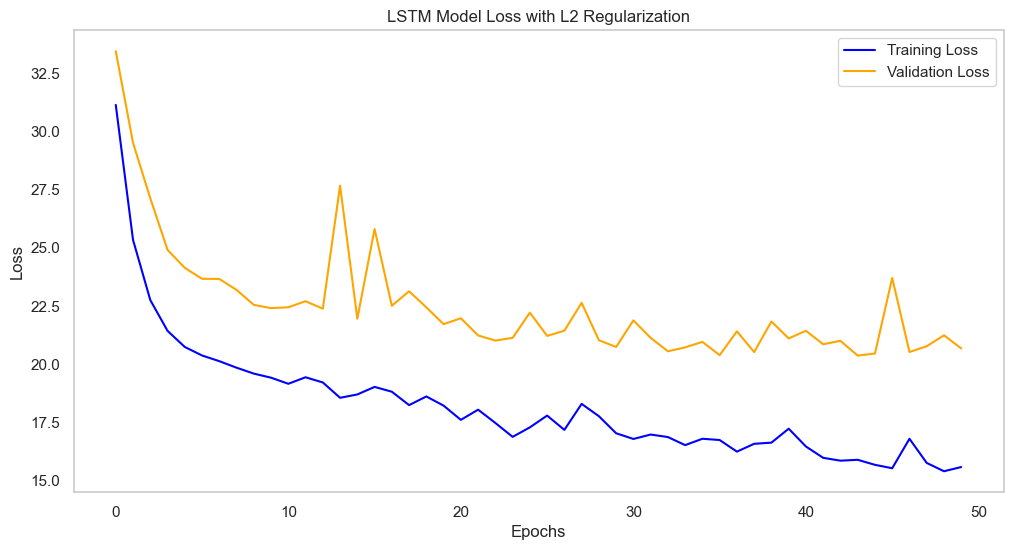

In [37]:
# Step 2: Convert 'Date' to datetime format and create Year, Month, Day columns
soil['Date'] = pd.to_datetime(soil['Date'])
soil['Year'] = soil['Date'].dt.year
soil['Month'] = soil['Date'].dt.month
soil['Day'] = soil['Date'].dt.day

# Step 3: Prepare the data
features = [
    'Temperature (°C)', 
    'Humidity (%)', 
    'Precipitation (mm)', 
    'Dewpoint (°C)', 
    'Windspeed (m/s)', 
    'Evapotranspiration (mm)', 
    'Soil Type',  # This will be converted to dummy variables
    'Soil Carbon', 
    'Nitrogen', 
    'Year', 
    'Month', 
    'Day',
    'soil_temperature_18cm (°C)',
    'Soil Moisture',
    'Wind Gusts (m/s)',
    'Cloudcover (%)'
]


# Impute missing values with the median
soil[features] = soil[features].fillna(soil[features].median())

# Convert categorical variable 'Soil Type' to dummy variables
X = pd.get_dummies(soil[features], drop_first=True)  # Use drop_first=True to avoid dummy variable trap
y = soil['Soil ph value']

# Step 4: Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Create sequences for LSTM input
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Choose time steps (number of previous time steps to consider)
time_steps = 10  # Adjust this based on your data and requirements
X_seq, y_seq = create_sequences(pd.DataFrame(X_scaled), pd.Series(y), time_steps)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Step 7: Build the LSTM model with L2 regularization
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
               kernel_regularizer=l2(0.1)))  # L2 regularization
model.add(Dropout(0.15))
model.add(LSTM(50, return_sequences=False, kernel_regularizer=l2(0.01)))  # L2 regularization
model.add(Dropout(0.15))
model.add(Dense(1, kernel_regularizer=l2(0.2)))  # Output layer with L2 regularization

# Step 8: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 9: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Step 10: Make predictions
y_pred_lstm = model.predict(X_test)

# Step 11: Evaluate the model
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)

# Step 12: Print the metrics
print(f'LSTM Regression Metrics with L2 Regularization:')
print(f'Mean Squared Error (MSE): {mse_lstm}')
print(f'Mean Absolute Error (MAE): {mae_lstm}')
print(f'Root Mean Squared Error (RMSE): {rmse_lstm}')

# Step 15: Plotting the loss graph for Neural Network
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM Model Loss with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

## Model 8: Hybrid Model: RF + NN

Epoch 1/50
26/26 - 0s - loss: 29.7030 - val_loss: 18.4081 - 145ms/epoch - 6ms/step
Epoch 2/50
26/26 - 0s - loss: 4.8623 - val_loss: 12.5675 - 22ms/epoch - 843us/step
Epoch 3/50
26/26 - 0s - loss: 3.2434 - val_loss: 11.3228 - 21ms/epoch - 804us/step
Epoch 4/50
26/26 - 0s - loss: 2.5050 - val_loss: 11.7198 - 21ms/epoch - 798us/step
Epoch 5/50
26/26 - 0s - loss: 2.5296 - val_loss: 11.9989 - 22ms/epoch - 860us/step
Epoch 6/50
26/26 - 0s - loss: 2.1458 - val_loss: 12.0657 - 21ms/epoch - 824us/step
Epoch 7/50
26/26 - 0s - loss: 2.4779 - val_loss: 11.9931 - 21ms/epoch - 790us/step
Epoch 8/50
26/26 - 0s - loss: 2.1752 - val_loss: 11.9018 - 21ms/epoch - 799us/step
Epoch 9/50
26/26 - 0s - loss: 2.1050 - val_loss: 11.7786 - 22ms/epoch - 861us/step
Epoch 10/50
26/26 - 0s - loss: 1.8378 - val_loss: 11.7953 - 22ms/epoch - 828us/step
Epoch 11/50
26/26 - 0s - loss: 1.8829 - val_loss: 12.2738 - 21ms/epoch - 822us/step
Epoch 12/50
26/26 - 0s - loss: 2.3001 - val_loss: 12.1463 - 20ms/epoch - 784us/step
E

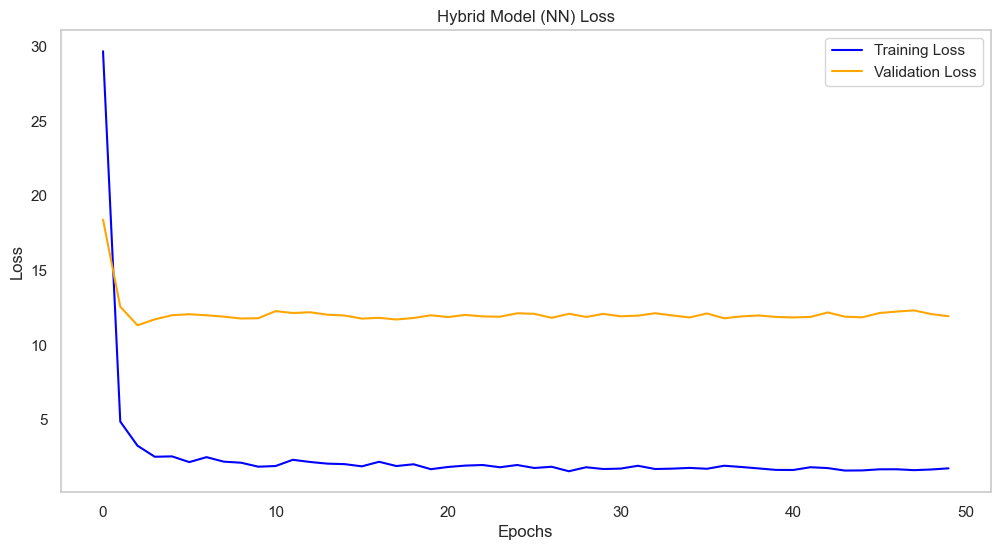

In [38]:
# Step 2: Convert 'Date' to datetime format and create Year, Month, Day columns
soil['Date'] = pd.to_datetime(soil['Date'])
soil['Year'] = soil['Date'].dt.year
soil['Month'] = soil['Date'].dt.month
soil['Day'] = soil['Date'].dt.day

# Step 3: Prepare the data
features = [
    'Temperature (°C)', 
    'Humidity (%)', 
    'Precipitation (mm)', 
    'Dewpoint (°C)', 
    'Windspeed (m/s)', 
    'Evapotranspiration (mm)', 
    'Soil Type',  # This will be converted to dummy variables
    'Soil Carbon', 
    'Nitrogen', 
    'Year', 
    'Month', 
    'Day',
    'soil_temperature_18cm (°C)',
    'Soil Moisture',
    'Wind Gusts (m/s)',
    'Cloudcover (%)'
]

# Convert categorical variable 'Soil Type' to dummy variables
X = pd.get_dummies(soil[features], drop_first=True)  # Use drop_first=True to avoid dummy variable trap
y = soil['Soil ph value']

# Step 4: Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Make predictions with Random Forest
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Step 8: Prepare data for Neural Network by combining original features with RF predictions
X_train_nn = np.hstack((X_train, rf_train_pred.reshape(-1, 1)))
X_test_nn = np.hstack((X_test, rf_test_pred.reshape(-1, 1)))

# Step 9: Build the Neural Network model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train_nn.shape[1],)))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(1))  # Output layer

# Step 10: Compile the Neural Network model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Step 11: Train the Neural Network model
history = nn_model.fit(X_train_nn, y_train, epochs=50, batch_size=128, validation_data=(X_test_nn, y_test), verbose=2)

# Step 12: Make predictions with Neural Network
y_pred_nn = nn_model.predict(X_test_nn)

# Step 13: Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)

# Step 14: Print the metrics
print(f'Hybrid Model Regression Metrics:')
print(f'Mean Squared Error (MSE): {mse_nn}')
print(f'Mean Absolute Error (MAE): {mae_nn}')
print(f'Root Mean Squared Error (RMSE): {rmse_nn}')

# Step 15: Plotting the loss graph for Neural Network
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Hybrid Model (NN) Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

Epoch 1/100
26/26 - 0s - loss: 73.2224 - val_loss: 52.0681 - 177ms/epoch - 7ms/step
Epoch 2/100
26/26 - 0s - loss: 40.4442 - val_loss: 42.0390 - 24ms/epoch - 938us/step
Epoch 3/100
26/26 - 0s - loss: 30.7138 - val_loss: 35.1153 - 24ms/epoch - 910us/step
Epoch 4/100
26/26 - 0s - loss: 24.1298 - val_loss: 29.9916 - 25ms/epoch - 947us/step
Epoch 5/100
26/26 - 0s - loss: 20.0182 - val_loss: 26.1347 - 24ms/epoch - 927us/step
Epoch 6/100
26/26 - 0s - loss: 16.4091 - val_loss: 23.2862 - 24ms/epoch - 931us/step
Epoch 7/100
26/26 - 0s - loss: 14.0222 - val_loss: 21.4526 - 27ms/epoch - 1ms/step
Epoch 8/100
26/26 - 0s - loss: 11.9692 - val_loss: 19.9987 - 25ms/epoch - 962us/step
Epoch 9/100
26/26 - 0s - loss: 10.8187 - val_loss: 18.8134 - 25ms/epoch - 963us/step
Epoch 10/100
26/26 - 0s - loss: 9.3295 - val_loss: 17.8400 - 24ms/epoch - 928us/step
Epoch 11/100
26/26 - 0s - loss: 8.5893 - val_loss: 16.7060 - 24ms/epoch - 934us/step
Epoch 12/100
26/26 - 0s - loss: 7.9707 - val_loss: 16.9731 - 24ms/ep

Epoch 98/100
26/26 - 0s - loss: 2.4298 - val_loss: 12.0251 - 25ms/epoch - 958us/step
Epoch 99/100
26/26 - 0s - loss: 2.6193 - val_loss: 12.6566 - 24ms/epoch - 930us/step
Epoch 100/100
26/26 - 0s - loss: 2.4213 - val_loss: 13.2675 - 26ms/epoch - 1ms/step
27/27 [==============================] - 0s 306us/step
Hybrid Model Regression Metrics:
Mean Squared Error (MSE): 12.75547399575414
Mean Absolute Error (MAE): 1.2554642251416557
Root Mean Squared Error (RMSE): 3.5714806447402374


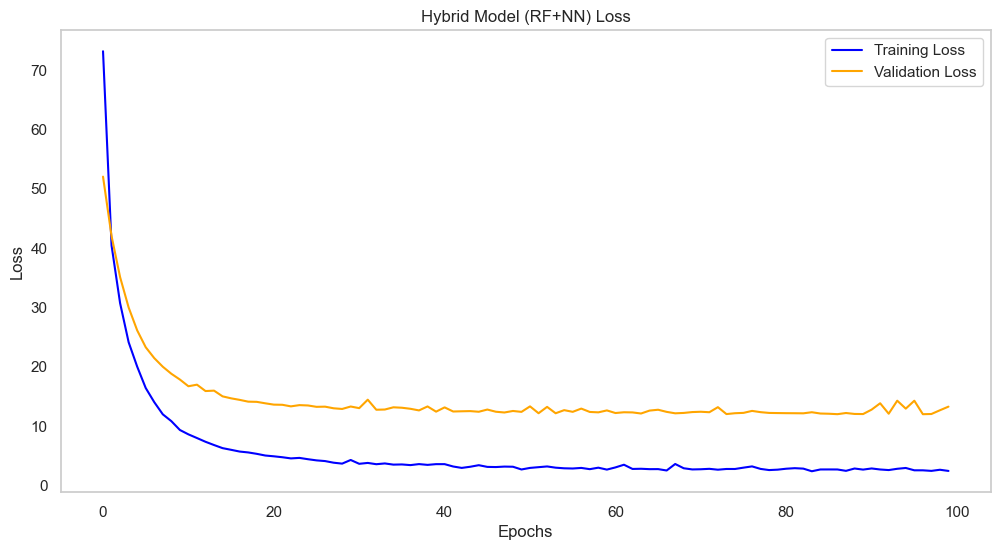

In [39]:
# Ensure the 'Date' column is in datetime format and create Year, Month, Day columns
soil['Date'] = pd.to_datetime(soil['Date'])
soil['Year'] = soil['Date'].dt.year
soil['Month'] = soil['Date'].dt.month
soil['Day'] = soil['Date'].dt.day

# Prepare the data
features = [
    'Temperature (°C)', 
    'Humidity (%)', 
    'Precipitation (mm)', 
    'Dewpoint (°C)', 
    'Windspeed (m/s)', 
    'Evapotranspiration (mm)', 
    'Soil Type',  # This will be converted to dummy variables
    'Soil Carbon', 
    'Nitrogen', 
    'Year', 
    'Month', 
    'Day',
    'soil_temperature_18cm (°C)',
    'Soil Moisture',
    'Wind Gusts (m/s)',
    'Cloudcover (%)'
]

X = soil[features]
y = soil['Soil ph value']

# Convert categorical 'Soil Type' to dummy variables
X = pd.get_dummies(X, columns=['Soil Type'], drop_first=True)

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model with more estimators and depth
rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Prepare data for Neural Network by combining original features with RF predictions
X_train_nn = np.hstack((X_train, rf_train_pred.reshape(-1, 1)))
X_test_nn = np.hstack((X_test, rf_test_pred.reshape(-1, 1)))

# Build a more complex Neural Network model with L2 regularization
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],), kernel_regularizer=l2(0.0001)))  # L2 regularization
nn_model.add(Dropout(0.25))  
nn_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.4)))  # L2 regularization
nn_model.add(Dropout(0.25))
nn_model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.4)))  # L2 regularization
nn_model.add(Dense(1))  # Output layer

# Compile the Neural Network model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Neural Network model with more epochs and a smaller batch size
history = nn_model.fit(X_train_nn, y_train, epochs=100, batch_size=128, validation_data=(X_test_nn, y_test), verbose=2)

# Make predictions with Neural Network
y_pred_nn = nn_model.predict(X_test_nn)

# Evaluate the hybrid model
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)

# Print the metrics
print(f'Hybrid Model Regression Metrics:')
print(f'Mean Squared Error (MSE): {mse_nn}')
print(f'Mean Absolute Error (MAE): {mae_nn}')
print(f'Root Mean Squared Error (RMSE): {rmse_nn}')

# Plotting the loss graph for Neural Network
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Hybrid Model (RF+NN) Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [40]:
# Display the structure of the Neural Network model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               2944      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13313 (52.00 KB)
Trainable params: 13313

In [41]:
# Display hyperparameters for each layer
print("Model Layer Hyperparameters:")
for i, layer in enumerate(nn_model.layers):
    print(f"Layer {i+1} ({layer.__class__.__name__}):")
    for key, value in layer.get_config().items():
        print(f"  {key}: {value}")
    print()

# Display optimizer hyperparameters
print("Optimizer Hyperparameters:")
optimizer_config = nn_model.optimizer.get_config()
for key, value in optimizer_config.items():
    print(f"  {key}: {value}")


Model Layer Hyperparameters:
Layer 1 (Dense):
  name: dense_4
  trainable: True
  dtype: float32
  batch_input_shape: (None, 22)
  units: 128
  activation: relu
  use_bias: True
  kernel_initializer: {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}
  bias_initializer: {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}
  kernel_regularizer: {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 9.999999747378752e-05}, 'registered_name': None}
  bias_regularizer: None
  activity_regularizer: None
  kernel_constraint: None
  bias_constraint: None

Layer 2 (Dropout):
  name: dropout_4
  trainable: True
  dtype: float32
  rate: 0.25
  noise_shape: None
  seed: None

Layer 3 (Dense):
  name: dense_5
  trainable: True
  dtype: float32
  units: 64
  activation: relu
  use_bias: True
  kernel_initializer: {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'co

## Saving the predictions to a csv using best model: Hybrid Model (RF+NN)

In [42]:
# Convert Neural Network predictions to 1D array for compatibility
y_pred_nn = y_pred_nn.flatten()

# Creating a DataFrame to display Actual, Predicted, and Difference values
results_df = pd.DataFrame({
    'Actual Soil pH': y_test,
    'Predicted Soil pH': y_pred_nn,
    'Difference': y_test - y_pred_nn
})

# Displaying the first few rows of the results DataFrame
print("Comparison of Actual vs Predicted Soil pH Values:")
results_df

Comparison of Actual vs Predicted Soil pH Values:


,Actual Soil pH,Predicted Soil pH,Difference
3540,4.8,5.011089,-0.211089
3176,4.8,4.863093,-0.063093
175,44.1,30.869810,13.230190
3054,4.8,4.923066,-0.123066
2112,4.8,4.911327,-0.111327
...,...,...,...
1765,4.8,5.655912,-0.855912
2534,4.8,4.850194,-0.050194
1278,4.8,5.073247,-0.273247
729,4.5,5.624929,-1.124929


In [43]:
# Step 1: Predict using Random Forest for the entire dataset
rf_full_pred = rf_model.predict(X_scaled)

# Step 2: Prepare data for Neural Network by combining original features with RF predictions
X_nn_full = np.hstack((X_scaled, rf_full_pred.reshape(-1, 1)))

# Step 3: Predict using Neural Network for the entire dataset
y_pred_full_nn = nn_model.predict(X_nn_full)

# Step 4: Create a DataFrame for the entire dataset with Actual, Predicted, and Difference
y_pred_full_nn = y_pred_full_nn.flatten()  # Convert to 1D array for compatibility

results_df_full = pd.DataFrame({
    'Actual Soil pH': soil['Soil ph value'],  # Use the original column for actual values
    'Predicted Soil pH': y_pred_full_nn,
    'Difference': soil['Soil ph value'] - y_pred_full_nn
})

# Display the first few rows of the results DataFrame
print("Comparison of Actual vs Predicted Soil pH Values for Entire Dataset:")
print(results_df_full.head())

# Step 5: Save the predictions to a CSV file
results_df_full.to_csv('dataset_with_soil_pH_predictions.csv', index=False)

131/131 [==============================] - 0s 306us/step
Comparison of Actual vs Predicted Soil pH Values for Entire Dataset:
   Actual Soil pH  Predicted Soil pH  Difference
0             4.8           5.041905   -0.241905
1             4.8           5.124651   -0.324651
2             4.8           5.116752   -0.316752
3             4.8           5.192657   -0.392657
4             7.2           6.847913    0.352087
